# Import unsere Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kombinieren der csv Dateien

In [2]:
cities=['amsterdam','athens','barcelona','berlin','budapest','lisbon','london','paris','rome','vienna']
time_periods=['weekdays','weekends']

dfs=[]         # erstelle eine leere Liste wo jede einzelne csv datei in m forma von dataframe gespeichert wird .
for city in cities:
    for period in time_periods:                                 
        filename= f'{city}_{period}.csv'
        df=pd.read_csv(filename)
        df['stadt']=city.capitalize()
        df['wochenabschnitt']=period
        dfs.append(df)

df_combined = pd.concat(dfs,ignore_index=True)     

'''Zuerst erstelle ich zwei Listen.Gehe mit einer For_Schleife durch die liste cities und durch die liste time_periods.
Erstelle eine neue Variable "filename" befühle sie mit jeder Stadt und time period .csv.
erstelle zwei neue Spalten Stadt und Wochenabschnitt und füge das ind der dfs Liste .
unter der Variable df_combined füge ich mit pd.concat die listen untereinander in einer gesamten.'''

'Zuerst erstelle ich zwei Listen.Gehe mit einer For_Schleife durch die liste cities und durch die liste time_periods.\nErstelle eine neue Variable "filename" befühle sie mit jeder Stadt und time period .csv.\nerstelle zwei neue Spalten Stadt und Wochenabschnitt und füge das ind der dfs Liste .\nunter der Variable df_combined füge ich mit pd.concat die listen untereinander in einer gesamten.'

# EDA - Explorative Datenanalyse

## Erster Überblick auf das Dataframe

In [3]:
df_combined.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,stadt,wochenabschnitt
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekdays
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekdays
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekdays
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekdays
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekdays


<!-- # Erstelle eine Copy   : df_copy_2  -->

## Kopie des Datensatzes

In [4]:
df_copy_2=df_combined.copy()


## Spalte Unnamed wird entfernt

In [5]:
df_copy_2.drop(columns=['Unnamed: 0'], inplace=True)
df_copy_2

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,stadt,wochenabschnitt
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,weekends
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,weekends
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,weekends
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,weekends


## Fehlende Werte 

In [6]:
df_copy_2.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
stadt                         0
wochenabschnitt               0
dtype: int64

# Umbennenung der Spalten 

In [7]:
df_copy_2.rename(columns={'realSum': 'price', 'dist': 'centr_dist','stadt': 'city' ,'wochenabschnitt':'week'}, inplace=True)

In [8]:
df_copy_2

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,centr_dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,weekends
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,weekends
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,weekends
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,weekends


## .info()

In [9]:
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  centr_dist                  51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

## describe()

In [10]:
df_copy_2.describe()

,price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,centr_dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [11]:
df_copy_2.describe(include='O')

,room_type,city,week
count,51707,51707,51707
unique,3,10,2
top,Entire home/apt,London,weekends
freq,32648,9993,26207


In [12]:
df_copy_2['city'].value_counts()


city
London       9993
Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: count, dtype: int64

## Duplikate behandeln (wenn da)

In [13]:
print(df_copy_2.duplicated().sum()) 

0


## Ändern des Datentypes 

In [14]:
df['biz']=df.biz.astype('bool')
df['multi']=df.multi.astype('bool')
df.dtypes

Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                            bool
biz                              bool
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
stadt                          object
wochenabschnitt                object
dtype: object

## Obwohl sie als int64 aufgeführt sind, können wir die Spalten „biz“ und „multi“ in boolesche Werte ändern, da es sich lediglich um True/False-Spalten handelt.

## 📌 Preise auf Ausreißer prüfen (Boxplot + Histogramm)

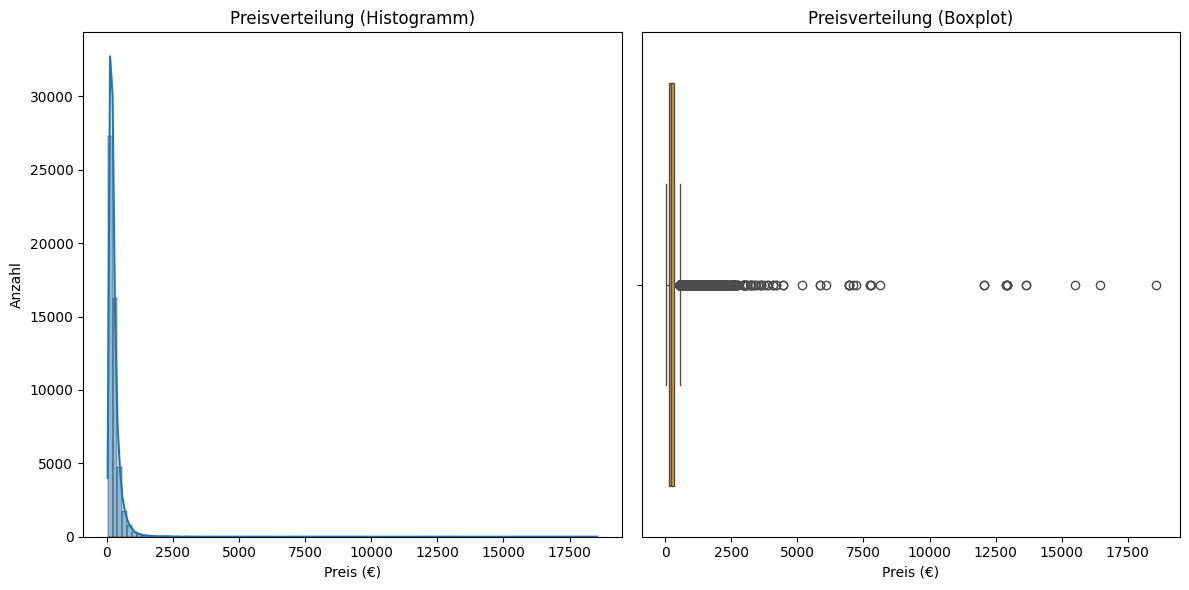

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Histogramm
plt.subplot(1, 2, 1)
sns.histplot(df_copy_2['price'], bins=100, kde=True)
plt.title("Preisverteilung (Histogramm)")
plt.xlabel("Preis (€)")
plt.ylabel("Anzahl")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_copy_2['price'], color='orange')
plt.title("Preisverteilung (Boxplot)")
plt.xlabel("Preis (€)")

plt.tight_layout()
plt.show()


###  Erklärung:
#### 🔸 Histogramm (links)
Das zeigt wie häufig Preise in bestimmten Bereichen vorkommen:

    Viele Einträge = hoher Balken.

    Rechtsseitiger „Schwanz“ = Hinweis auf sehr hohe Preise → rechtsschiefe Verteilung.

    Das ist bei Preisen ganz normal.


#### 🔸 Boxplot (rechts)
Das zeigt die Verteilung und Ausreißer:

    Der dicke Balken in der Mitte ist der Median (Zentralwert).

    Der Kasten zeigt das Interquartilsintervall (IQR) – also wo 50 % der Werte liegen.

    Die "Whisker-Linien" zeigen den normalen Wertebereich.

    Punkte außerhalb der Linien = Ausreißer.

##  Erkenntnisse aus diesem Schritt:
    Sind die meisten Preise z. B. unter 300 €?

    Gibt es sehr viele Listings mit Preisen über z. B. 1.000 €? → Dann haben wir starke Ausreißer, die später ggf. analysiert oder entfernt werden können.

    Bei extrem schiefer Verteilung kann ein logarithmischer Plot (Schritt 2) helfen.

##  Logarithmische Preis-Skala zur besseren Lesbarkeit

(Wenn viele Ausreißer den Plot "plattdrücken", hilft eine Log-Skala:)

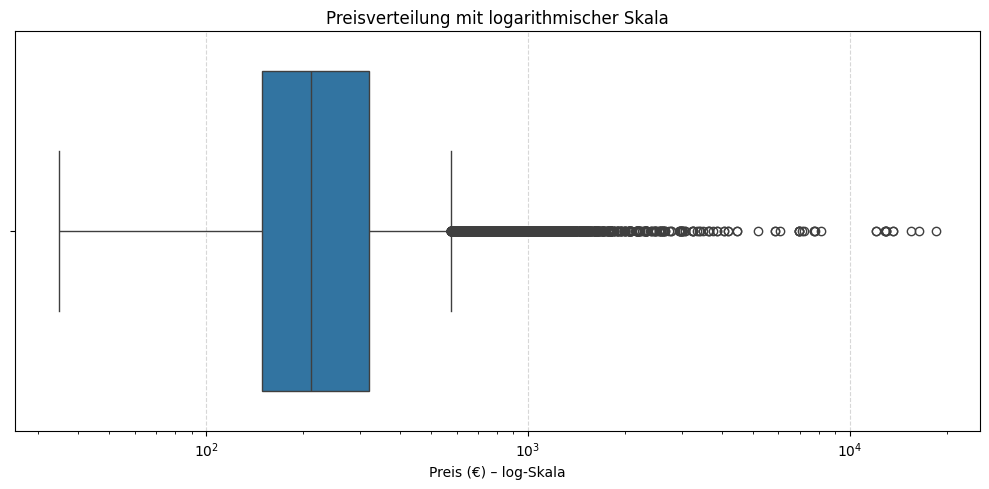

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_copy_2['price'])
plt.xscale('log')
plt.title('Preisverteilung mit logarithmischer Skala')
plt.xlabel('Preis (€) – log-Skala')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Zwischenerkenntnis


### Die Preisverteilung ist stark rechtsschief – viele günstige Angebote, einige sehr teure.

### Die Boxplots (auch mit Log-Skalierung) zeigen klare Ausreißer – z. B. Listings mit Preisen deutlich über dem normalen Niveau.

### Ja, wir haben Ausreißer – das ist eindeutig.

In [17]:
# Schritt 3: Ausreißer mit IQR-Methode berechnen
Q1 = df_copy_2['price'].quantile(0.25)
Q3 = df_copy_2['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Maske für Ausreißer erstellen
outlier_mask = (df_copy_2['price'] < lower_bound) | (df_copy_2['price'] > upper_bound)

# Anzahl und Anteil berechnen
outlier_count = outlier_mask.sum()
total_count = len(df_copy_2)
outlier_percentage = round((outlier_count / total_count) * 100, 2)

print(f"Anzahl Ausreißer: {outlier_count}")
print(f"Gesamtanzahl: {total_count}")
print(f"Anteil der Ausreißer: {outlier_percentage}%")


Anzahl Ausreißer: 3662
Gesamtanzahl: 51707
Anteil der Ausreißer: 7.08%


## Erstellung einer Spalte ( die Ausreißer)

In [18]:
# IQR-Methode zur Erkennung der Ausreißer
Q1 = df_copy_2['price'].quantile(0.25)
Q3 = df_copy_2['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Neue Spalte zur Kennzeichnung der Ausreißer
df_copy_2['is_outlier'] = (df_copy_2['price'] < lower_bound) | (df_copy_2['price'] > upper_bound)

# Beispiel: Wie viele Ausreißer gibt es?
print(df_copy_2['is_outlier'].value_counts())

# True = Ausreißer 


is_outlier
False    48045
True      3662
Name: count, dtype: int64


## Was passiert hier?
 Q1 und Q3: Die Quartile definieren den mittleren 50 %-Bereich der Preise.

IQR: Die Spannweite zwischen Q1 und Q3.

lower_bound & upper_bound: Alles unterhalb bzw. oberhalb dieser Schwellenwerte gilt als Ausreißer.

df['is_outlier'] = ...: Hier wird die Bedingung für Ausreißer direkt in eine neue Spalte geschrieben.

value_counts(): Zeigt dir, wie viele True (Ausreißer) und False (normale Werte) vorkommen.

## Spaltenübersicht

In [19]:
df_copy_2.columns

Index(['price', 'room_type', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'centr_dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat', 'city', 'week', 'is_outlier'],
      dtype='object')



# Korrelations Heatmap für die Beziehung nummersicher Variablen

###   1. Numerische Spalten auswählen
Zuerst filtern wir nur die numerischen Spalten aus dem DataFrame:

In [20]:
# Nur numerische Spalten auswählen
df_numeric = df_copy_2.select_dtypes(include=['float64', 'int64'])

### 2. Korrelation berechnen
Jetzt berechnen wir die Korrelationsmatrix:

In [21]:
# Korrelationsmatrix berechnen
corr_matrix = df_numeric.corr()


### 3. Heatmap zeichnen
Mit Seaborn erzeugen wir eine farbige Heatmap:

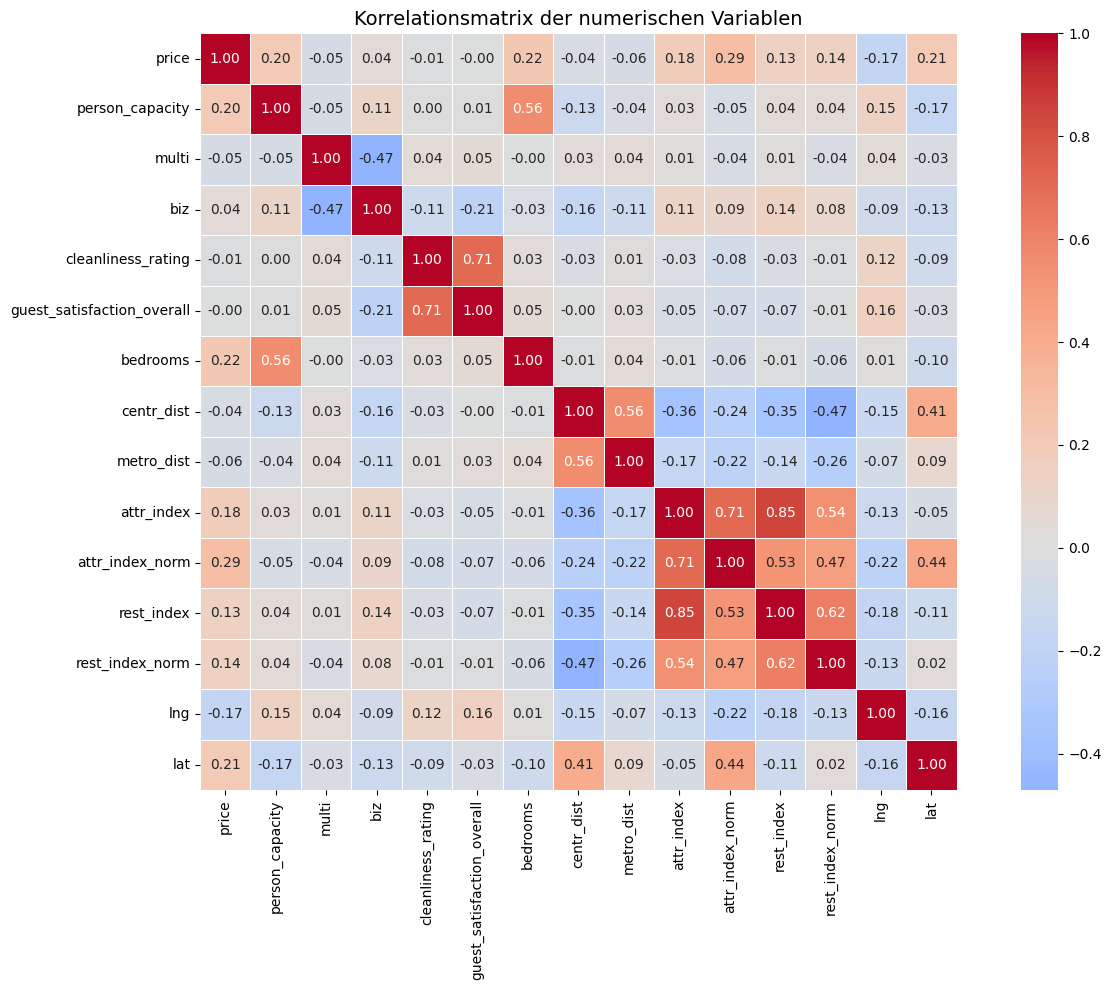

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)

plt.title("Korrelationsmatrix der numerischen Variablen", fontsize=14)
plt.tight_layout()
plt.show()


# Datenanalyse

# 1. Gesamtumsatz pro Stadt

## Wir wollen wissen, in welchen Städten insgesamt am  meisten verdient wurde.

    Gruppiere die Daten nach city

    Summiere die Preise (Umsatz) je Stadt

    Sortiere die Ergebnisse (absteigend)

    Visualisiere als Balkendiagramm                 

In [23]:
umsatz_stadt = df_copy_2.groupby('city')['price'].sum().sort_values(ascending=False).round(0)
umsatz_stadt

city
London       3622155.0
Paris        2625250.0
Rome         1854073.0
Lisbon       1372807.0
Amsterdam    1192075.0
Vienna        854477.0
Barcelona     832204.0
Athens        801209.0
Budapest      709937.0
Berlin        607546.0
Name: price, dtype: float64

C:\Users\varel\AppData\Local\Temp\ipykernel_31076\2957621810.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=umsatz_stadt.index, y=umsatz_stadt.values, palette='viridis',edgecolor='black')


NameError: name 'mtick' is not defined

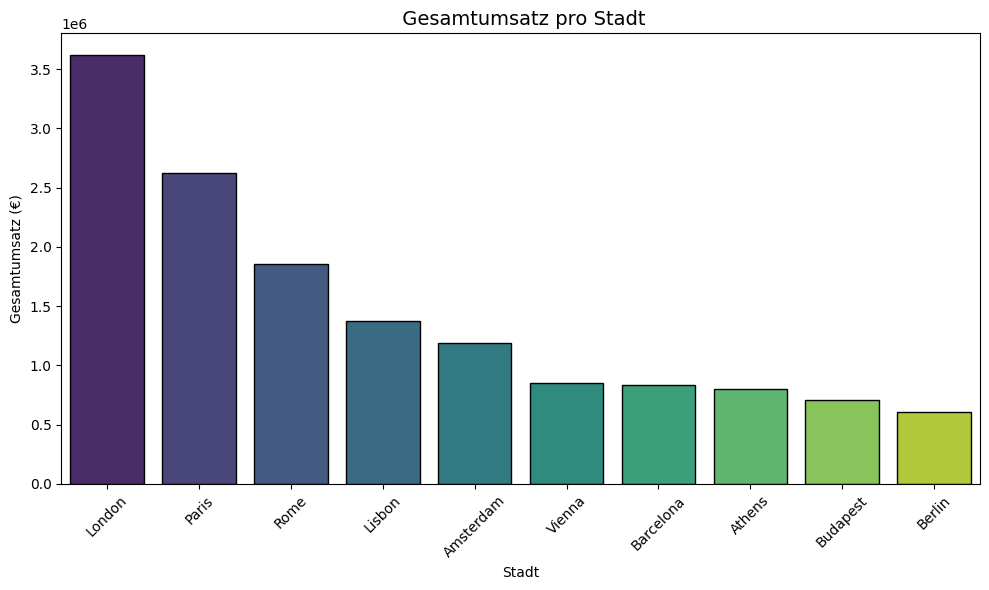

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Schritt 1–3: Gesamtumsatz pro Stadt berechnen
umsatz_stadt = df_copy_2.groupby('city')['price'].sum().sort_values(ascending=False)

# Schritt 4: Visualisierung
plt.figure(figsize=(10, 6))
sns.barplot(x=umsatz_stadt.index, y=umsatz_stadt.values, palette='viridis',edgecolor='black')

plt.title(' Gesamtumsatz pro Stadt', fontsize=14)
plt.xlabel('Stadt')
plt.ylabel('Gesamtumsatz (€)')
plt.xticks(rotation=45)
plt.tight_layout()
# Währung als ganze Zahl anzeigen
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))
plt.show()


# Was sagt uns das ganze ? 

     Städte mit mehr oder teureren Unterkünften erzeugen automatisch höheren Umsatz.

    So erkennst du auf einen Blick, wo Airbnb besonders lukrativ ist.

#  2: Durchschnittsumsatz pro Stadt

###  Hier berechnen wir den durchschnittlichen Preis aller Unterkünfte je Stadt. Damit sehen wir, wo eine Unterkunft im Mittel am teuersten oder günstigsten ist.

### ✅ Schritt 1: Berechnung & Sortierung

In [ ]:
# Berechnung des Durchschnittsumsatzes pro Stadt
durchschnitt_stadt = df_copy_2.groupby('city')['price'].mean().sort_values(ascending=False)
durchschnitt_stadt

city
Amsterdam    573.112795
Paris        392.531403
London       362.469256
Barcelona    293.753706
Berlin       244.583752
Vienna       241.582484
Lisbon       238.210479
Rome         205.391950
Budapest     176.513548
Athens       151.744121
Name: price, dtype: float64

### ✅ Schritt 2: Visualisierung 

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1078550001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=durchschnitt_stadt.index, y=durchschnitt_stadt.values, palette='coolwarm',edgecolor='black')
C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1078550001.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\varel\OneDrive - DataSmart Point GmbH\Desktop\Python V+N\Pandas\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


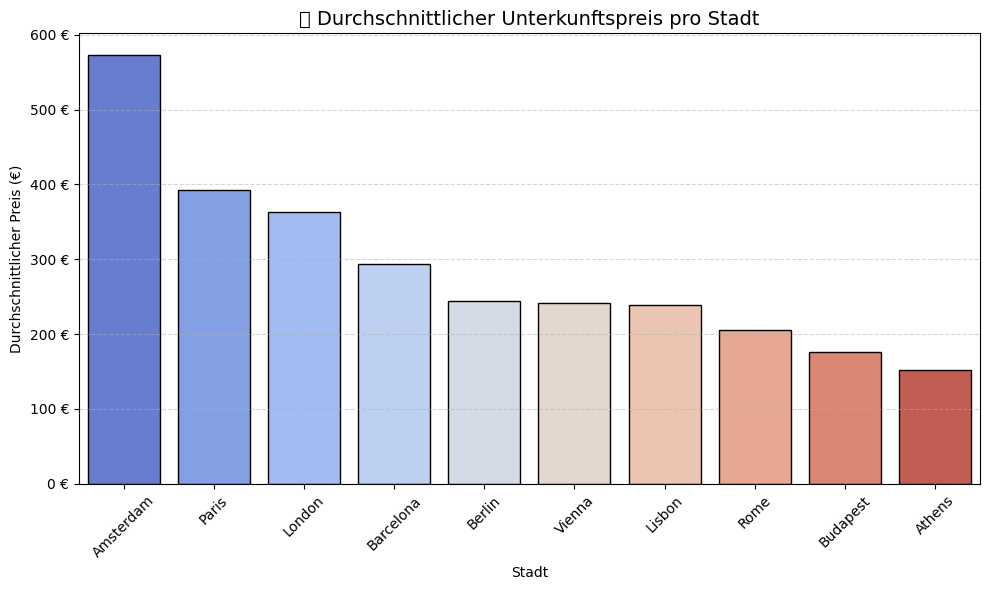

In [ ]:
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=durchschnitt_stadt.index, y=durchschnitt_stadt.values, palette='coolwarm',edgecolor='black')

plt.title('📈 Durchschnittlicher Unterkunftspreis pro Stadt', fontsize=14)
plt.xlabel('Stadt')
plt.ylabel('Durchschnittlicher Preis (€)')
plt.xticks(rotation=45)

# Formatierung der Y-Achse (ganze Euro mit Tausenderkommas)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Erklärung & Interpretation

### Um zu verstehen, wo Premiumpreise verlangt werden (z. B. beliebte Touristenstädte), und wo eher günstiger gewohnt werden kann.

#  3: Anzahl der gebuchten Unterkünfte pro Stadt

Hier schauen wir uns an, wie viele Unterkünfte pro Stadt im Datensatz vorkommen. Das gibt uns ein Gefühl für das Angebotsvolumen je Stadt – also: Wo wird besonders viel angeboten?

###  ✅ Schritt 1: Gruppierung und Zählung

In [ ]:
# Anzahl der Unterkünfte je Stadt zählen
anzahl_je_stadt = df_copy_2['city'].value_counts()
anzahl_je_stadt


city
London       9993
Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: count, dtype: int64

### ✅ Schritt 2: Visualisierung

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\4097571250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anzahl_je_stadt.index, y=anzahl_je_stadt.values, palette="viridis",edgecolor='black')


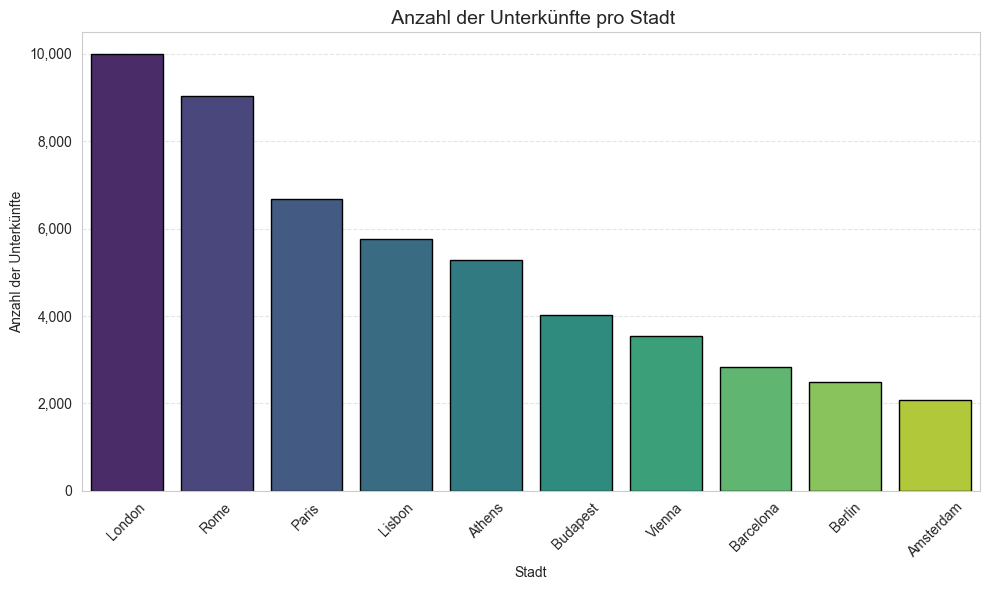

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=anzahl_je_stadt.index, y=anzahl_je_stadt.values, palette="viridis",edgecolor='black')


plt.title(' Anzahl der Unterkünfte pro Stadt', fontsize=14)
plt.xlabel('Stadt')
plt.ylabel('Anzahl der Unterkünfte')
plt.xticks(rotation=45)

# Y-Achse auf ganze Zahlen formatieren
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Erklärung & Interpretation

### a) Ein hoher Balken bedeutet: Viele Unterkünfte in der Stadt → also ein großes Angebot. Niedriger Balken → kleines Angebot
    

## Warum ist das relevant?

### Wir sehen, wo Airbnb stark vertreten ist.

#### a) Im Vergleich zu Umsatz oder Durchschnittspreis lässt sich besser verstehen:
####  Zahlt eine Stadt viel Umsatz, weil sie viele Angebote hat oder weil die Preise hoch sind?

# WEEKS 

##  Umsatzverhalten unter der Woche vs. am Wochenende

### ✅ Schritt 1: Gesamtumsatz Wochentage vs. Wochenenden

In [ ]:
umsatz_wochenzeit = df_copy_2.groupby('week')['price'].sum().reset_index().round(2)
print(umsatz_wochenzeit)

       week       price
0  weekdays  7029888.56
1  weekends  7441845.46


C:\Users\varel\AppData\Local\Temp\ipykernel_27332\3253874030.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='week', y='price', data=umsatz_wochenzeit, palette='dark',edgecolor='black')


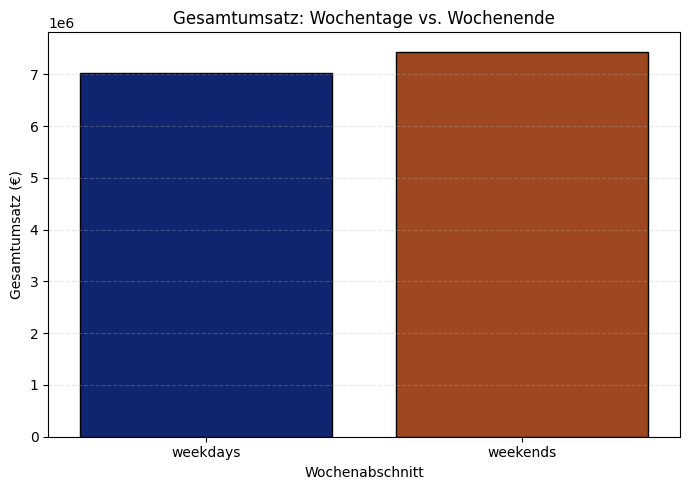

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gesamtumsatz je Wochenabschnitt berechnen
umsatz_wochenzeit = df_copy_2.groupby('week')['price'].sum().reset_index()

# Sortieren (damit 'weekday' zuerst kommt)
umsatz_wochenzeit = umsatz_wochenzeit.sort_values(by='week')

# Balkendiagramm
plt.figure(figsize=(7,5))
sns.barplot(x='week', y='price', data=umsatz_wochenzeit, palette='dark',edgecolor='black')
plt.title('Gesamtumsatz: Wochentage vs. Wochenende')
plt.xlabel('Wochenabschnitt')
plt.ylabel('Gesamtumsatz (€)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


###  Erklärung Schritt 1:
#### Wir gruppieren den DataFrame nach week (weekday/weekend).

#### Dann summieren wir die Preise (Umsatz).

#### Das Diagramm zeigt, an welchem Wochenteil mehr eingenommen wird.

### ✅ Schritt 2: Prozentualer Unterschied (Weekday vs. Weekend)

In [ ]:
umsatz_weekdays = umsatz_wochenzeit['weekdays']
umsatz_weekends = umsatz_wochenzeit['weekends']

# Prozentualer Unterschied (Wochenende im Vergleich zu Wochentagen)
prozent_diff = ((umsatz_weekends - umsatz_weekdays) / umsatz_weekdays) * 100

print(f"Umsatz Wochentage : {umsatz_weekdays:,.0f} €")
print(f"Umsatz Wochenende : {umsatz_weekends:,.0f} €")
print(f"Unterschied       : {prozent_diff:.2f} %")


Umsatz Wochentage : 7,029,889 €
Umsatz Wochenende : 7,441,845 €
Unterschied       : 5.86 %


###  Erklärung

##### Wir berechnen den Umsatz an Wochentagen und am Wochenende.

##### Dann vergleichen wir:
##### ((Wochenende - Wochentage) / Wochentage) * 100 = prozentuale Differenz.

##### Ein positives Ergebnis bedeutet: Wochenende bringt mehr Umsatz.

<Figure size 1400x700 with 0 Axes>

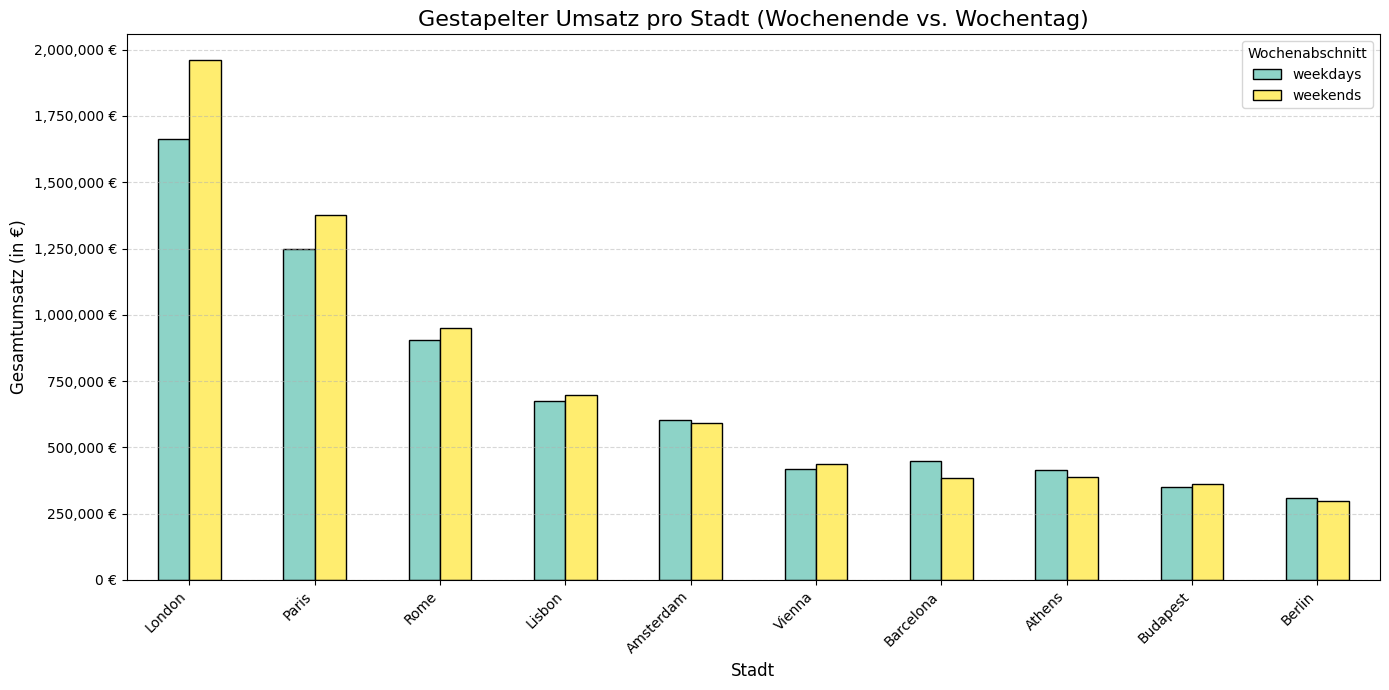

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Gruppierung: Umsatz je Stadt und Wochenabschnitt
umsatz_gruppe = df_copy_2.groupby(["city", "week"])["price"].sum().unstack().fillna(0)   # Gruppiert nach Stadt und ob Wochenende/Wochentag
                                                                                                    # unsatck	Wandelt die Wochenabschnitte in Spalten
                                                                                                    # stacked = False =stapelt nebeneinander
                                                                                                    # sort_value = sortiert Städte nach gesamtem Umsatz
# Sortiere nach Gesamtumsatz (Wochenende + Wochentag)
umsatz_gruppe["Gesamt"] = umsatz_gruppe.sum(axis=1)
umsatz_gruppe = umsatz_gruppe.sort_values("Gesamt", ascending=False)
umsatz_gruppe.drop(columns="Gesamt", inplace=True)

# Diagramm
plt.figure(figsize=(14, 7))
ax = umsatz_gruppe.plot(kind="bar", stacked=False, figsize=(14, 7), colormap="Set3",edgecolor='black')

# Achsentitel und Formatierung
ax.set_title("Gestapelter Umsatz pro Stadt (Wochenende vs. Wochentag)", fontsize=16)
ax.set_xlabel("Stadt", fontsize=12)
ax.set_ylabel("Gesamtumsatz (in €)", fontsize=12)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} €'))

# Beschriftung verbessern
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title="Wochenabschnitt")
plt.show()

### Zwischen visualisierung des Dataframes

In [ ]:
df_copy_2

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week,is_outlier,Price_Per_Person
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekdays,False,0.010307
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekdays,False,0.011620
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekdays,False,0.007573
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekdays,False,0.009227
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekdays,False,0.004119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,weekends,True,0.008381
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,weekends,False,0.006562
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,weekends,True,0.003139
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,weekends,False,0.006643


# HOST AND SUPERHOST

### Analyseplan für Superhosts:

    Wer generiert mehr Gesamtumsatz?

    Wie viele Buchungen (Anzahl Unterkünfte) haben Superhosts vs. normale Hosts?

    Durchschnittsumsatz pro Inserat (fairer Vergleich)?

    Sind Superhosts eher zentral oder weiter draußen (Entfernung zum Zentrum)?

    Zusätzliche Insights (z.B. Preis vs. Bewertung für Superhosts vs. normale Hosts).

### Schritt 1: Gesamtumsatz – Superhost vs. Normalhost

In [ ]:
# Code
umsatz_host = df_copy_2.groupby('host_is_superhost')['price'].sum()
umsatz_host.index = ['Normalhost', 'Superhost']

# Schöne Ausgabe mit Formatierung
for host, umsatz in umsatz_host.items():
    print(f"{host}: {umsatz:,.0f} €")


Normalhost: 11,104,882 €
Superhost: 3,366,852 €


C:\Users\varel\AppData\Local\Temp\ipykernel_27332\2733232371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=umsatz_host.index, y=umsatz_host.values, palette=['skyblue','salmon'],edgecolor='black')


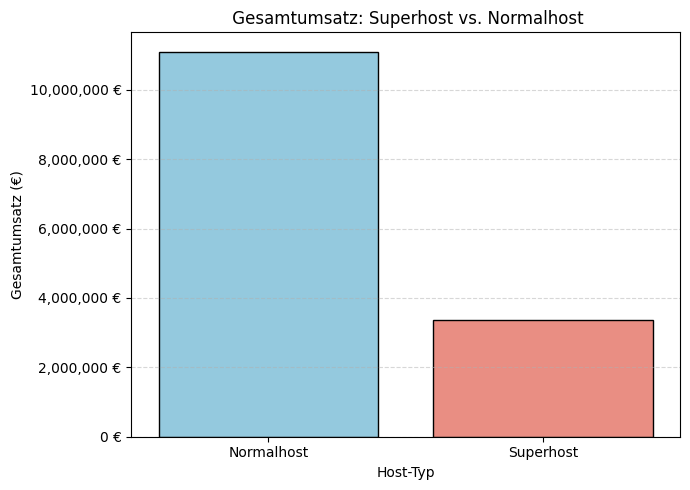

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(x=umsatz_host.index, y=umsatz_host.values, palette=['skyblue','salmon'],edgecolor='black')

plt.title(' Gesamtumsatz: Superhost vs. Normalhost')
plt.xlabel('Host-Typ')
plt.ylabel('Gesamtumsatz (€)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Schritt 2: Anzahl der Unterkünfte (Buchungen)

In [ ]:
# Code
anzahl_host = df_copy_2['host_is_superhost'].value_counts()
anzahl_host.index = ['Normalhost', 'Superhost']
print(anzahl_host)


Normalhost    38475
Superhost     13232
Name: count, dtype: int64


### Mehr normale Hosts = logisch, dass sie mehr Umsatz machen, auch wenn Superhosts pro Inserat evtl. erfolgreicher sind.

### Schritt 3: Durchschnittsumsatz pro Inserat

In [ ]:
# Code
durchschnitt_host = (umsatz_host / anzahl_host).round(2)
print(durchschnitt_host)


Normalhost    288.63
Superhost     254.45
dtype: float64


C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1499520781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=durchschnitt_host.index, y=durchschnitt_host.values, palette=['lightgreen','lightcoral'],edgecolor='black')


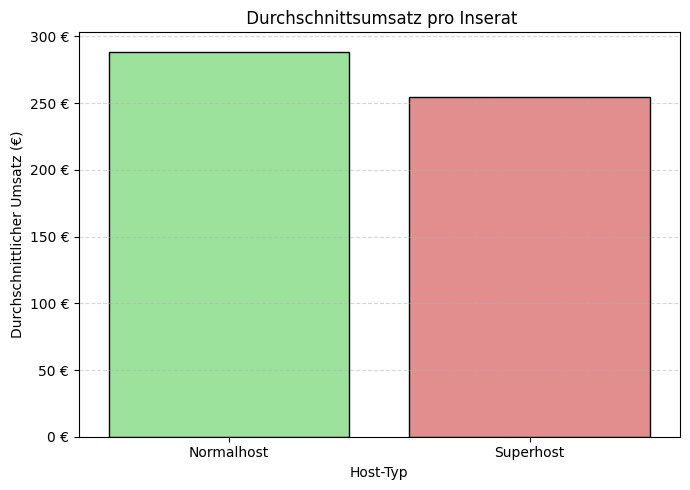

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=durchschnitt_host.index, y=durchschnitt_host.values, palette=['lightgreen','lightcoral'],edgecolor='black')

plt.title(' Durchschnittsumsatz pro Inserat')
plt.xlabel('Host-Typ')
plt.ylabel('Durchschnittlicher Umsatz (€)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Schritt 4: Zentrale Lage (Entfernung zum Zentrum)

##### Wir schauen uns an, ob Superhosts zentraler liegen:

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\4086390776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lage_host.index, y=lage_host.values, palette=['lightblue','orange'],edgecolor='black')


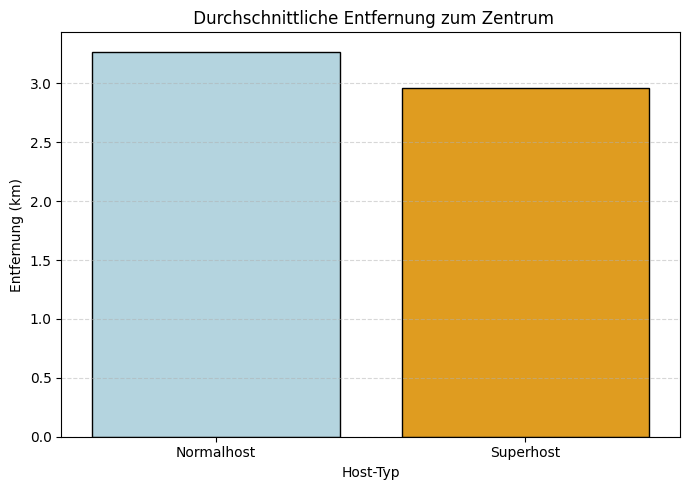

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=lage_host.index, y=lage_host.values, palette=['lightblue','orange'],edgecolor='black')

plt.title(' Durchschnittliche Entfernung zum Zentrum')
plt.xlabel('Host-Typ')
plt.ylabel('Entfernung (km)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Wenn Superhosts näher am Zentrum sind, ist das ein Plus für deren Attraktivität.

### Preisvergleich zwischen Superhost vs. normal Host

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\292192405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='host_is_superhost', y='price', data=df_copy_2, palette=['skyblue', 'salmon'])


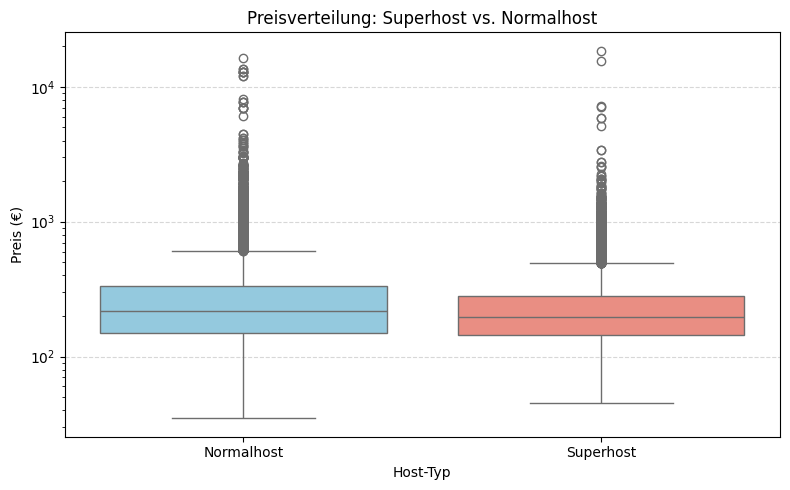

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='host_is_superhost', y='price', data=df_copy_2, palette=['skyblue', 'salmon'])
plt.xticks([0,1], ['Normalhost', 'Superhost'])
plt.yscale('log')  # Logarithmische Skala, weil Preise Ausreißer haben
plt.title('Preisverteilung: Superhost vs. Normalhost')
plt.xlabel('Host-Typ')
plt.ylabel('Preis (€)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Erklärung:

    Der dicke Strich in der Mitte ist der Medianpreis.

    Die Box zeigt die mittleren 50 % der Preise.

    Punkte weit oben sind Ausreißer (Luxuswohnungen).

    Liegt die Box des Superhosts höher, bedeutet das höhere Preise im Median.

### Bewertung: Wer bekommt bessere Bewertungen?

In [ ]:
bewertung_host = df_copy_2.groupby('host_is_superhost')['guest_satisfaction_overall'].mean()
bewertung_host.index = ['Normalhost', 'Superhost']

for host, score in bewertung_host.items():
    print(f"{host}: {score:.2f} Punkte")


Normalhost: 91.16 Punkte
Superhost: 96.90 Punkte


### Erklärung:

    Superhosts sollten im Schnitt höhere Bewertungen haben, weil sie besser gepflegt und kundenorientierter sind.

    Ein Unterschied von > 5,74 Punkten ist schon deutlich sichtbar.

## ✅ Letzter Schritt zum Thema Superhost: Verteilung nach Stadt

### Wir wollen wissen:

    Wie viele Superhosts gibt es pro Stadt?

    Welche Städte haben besonders viele Superhosts?

    Optional: Wie ist der Anteil Superhosts in jeder Stadt?

###  1. Anzahl Superhosts pro Stadt (nur absolute Zahl)

In [ ]:
superhost_stadt = df_copy_2[df_copy_2['host_is_superhost'] == 1]['city'].value_counts()
print(superhost_stadt)


city
Rome         2949
Athens       2263
London       1573
Budapest     1524
Lisbon       1233
Vienna       1005
Paris         941
Berlin        639
Amsterdam     591
Barcelona     514
Name: count, dtype: int64


C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1750053400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=superhost_stadt.index, y=superhost_stadt.values, palette='viridis',edgecolor='black')


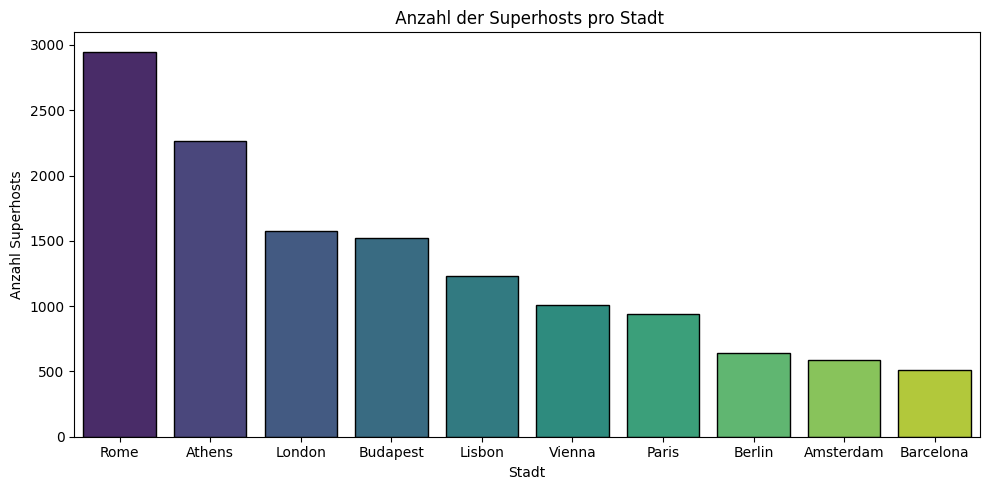

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=superhost_stadt.index, y=superhost_stadt.values, palette='viridis',edgecolor='black')
plt.title(' Anzahl der Superhosts pro Stadt')
plt.xlabel('Stadt')
plt.ylabel('Anzahl Superhosts')
plt.grid(axis='y',  alpha=0.0)
plt.tight_layout()
plt.show()


### Was lernen wir daraus?

    Eine hohe Zahl Superhosts bedeutet oft:
    → Viele erfahrene Gastgeber in der Stadt.

    Ein hoher Prozentanteil zeigt:
    → Die Stadt hat besonders professionelle oder hochwertige Angebot

In [ ]:
# Gesamtzahl der Unterkünfte pro Stadt
total_pro_stadt = df_copy_2['city'].value_counts()

# Superhosts pro Stadt
superhost_pro_stadt = df_copy_2[df_copy_2['host_is_superhost'] == 1]['city'].value_counts()

# Prozentanteil Superhosts je Stadt
anteil_superhost = (superhost_pro_stadt / total_pro_stadt * 100).round(2)

# Ausgabe: Tabelle mit Anzahl + Prozent
superhost_statistik = pd.DataFrame({
    'Anzahl Superhosts': superhost_pro_stadt,
    'Gesamtanzahl Unterkünfte': total_pro_stadt,
    'Prozentualer Anteil (%)': anteil_superhost
}).fillna(0).astype({'Anzahl Superhosts': 'int', 'Gesamtanzahl Unterkünfte': 'int'})

print(superhost_statistik.sort_values(by='Prozentualer Anteil (%)', ascending=False))


           Anzahl Superhosts  Gesamtanzahl Unterkünfte  \
city                                                     
Athens                  2263                      5280   
Budapest                1524                      4022   
Rome                    2949                      9027   
Amsterdam                591                      2080   
Vienna                  1005                      3537   
Berlin                   639                      2484   
Lisbon                  1233                      5763   
Barcelona                514                      2833   
London                  1573                      9993   
Paris                    941                      6688   

           Prozentualer Anteil (%)  
city                                
Athens                       42.86  
Budapest                     37.89  
Rome                         32.67  
Amsterdam                    28.41  
Vienna                       28.41  
Berlin                       25.72  
Lisbon 

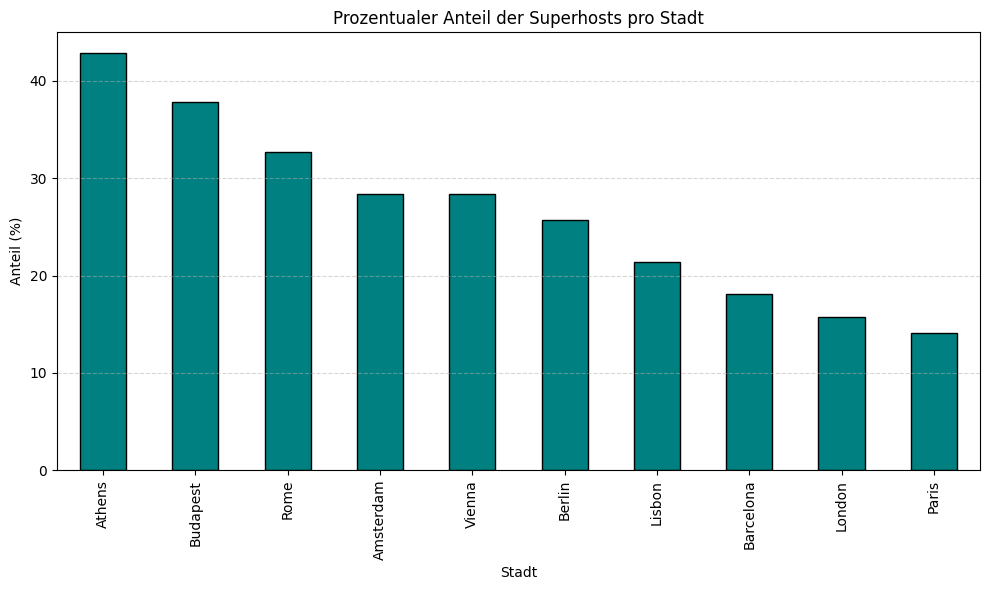

In [ ]:
plt.figure(figsize=(10,6))
(anteil_superhost.sort_values(ascending=False).plot(kind='bar', color='teal',edgecolor='black'))

plt.title('Prozentualer Anteil der Superhosts pro Stadt')
plt.xlabel('Stadt')
plt.ylabel('Anteil (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Was bedeutet das alles?

    Preis: Superhosts können oft mehr verlangen, weil Gäste mehr Vertrauen haben.

    Bewertung: Zeigt, wie stark Servicequalität den Erfolg beeinflusst.

    Lage: Superhosts sind häufig in Top-Lagen vertreten – das kann ihren Erfolg zusätzlich erklären.

    Anzahl Superhosts: Absolute Zahl pro Stadt.

    Prozentualer Anteil: Anteil Superhosts an allen Unterkünften in der Stadt.

    Ein hoher Anteil (z. B. >40 %) zeigt: Viele Profis/erfahrene Hosts in der Stadt.







# Zusammenfassung: Superhost vs. Normalhost

## 1. Gesamtumsatz

### Frage: Wer macht mehr Umsatz – Superhosts oder normale Hosts?

### Ergebnis:

##### Normalhosts haben einen höheren Gesamtumsatz, aber nur weil es viel mehr von ihnen gibt.

##### Diagramm: Balkenvergleich Gesamtumsatz (Normalhost vs. Superhost).

## 2. Anzahl der Unterkünfte

### Frage: Wie viele Unterkünfte haben Superhosts vs. normale Hosts?

### Ergebnis:

##### Normale Hosts machen den größten Anteil aus (typisch 70–80 %).

##### Balkendiagramm: Anzahl Inserate je Hosttyp.

## 3. Durchschnittsumsatz pro Inserat

### Frage: Wer verdient pro Unterkunft mehr?

### Ergebnis:

##### Superhosts haben einen höheren Durchschnittsumsatz pro Inserat.

##### Erklärung: Bessere Bewertungen + Top-Lagen = höhere Preise.

## 4. Lage zum Zentrum

### Frage: Sind Superhosts eher zentral oder abseits?

### Ergebnis:

##### Superhosts liegen im Durchschnitt näher am Zentrum, was ihren Erfolg zusätzlich erklärt.

## 5. Preise & Bewertungen

### Preis: Boxplot zeigt, dass Superhosts leicht höhere Preise nehmen, aber auch eine homogenere Preisstruktur haben (weniger extreme Ausreißer).

### Bewertung: Superhosts haben bessere Gästebewertungen (höhere guest_satisfaction_overall).

## 6. Verteilung nach Stadt

### Frage: In welchen Städten gibt es die meisten Superhosts?

### Ergebnis:

##### Absolute Zahl & Prozentanteil: Manche Städte haben besonders viele Superhosts (deutet auf mehr professionelle Gastgeber hin).

##### Diagramm: Anteil (%) Superhosts pro Stadt.

# Fazit:

### Superhosts sind im Schnitt zentraler, besser bewertet und profitabler pro Inserat, aber Normalhosts machen mehr Gesamtumsatz, da sie zahlreicher vertreten sind.

# Analyse: Zimmerarten (room_type)

## Wir beantworten folgende Fragen:

#### Wie verteilen sich die Zimmerarten?

#### Welche Zimmerarten sind am teuersten im Durchschnitt?

#### Wie ist die Bewertung (guest_satisfaction_overall) je Zimmerart?

## Schritt 1: Verteilung der Zimmerarten

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\968369396.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_counts.index, y=room_counts.values, palette='Set2',edgecolor='black')


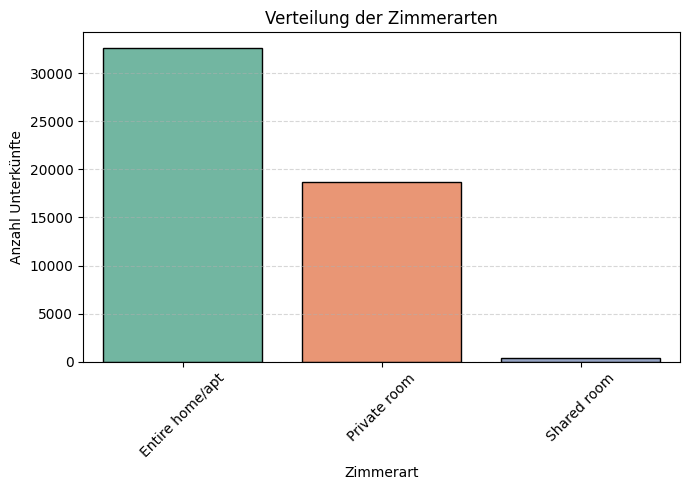

In [ ]:
room_counts = df_copy_2['room_type'].value_counts()                          # Zählt die Anzahl der Zimemerarten 

plt.figure(figsize=(7,5))
sns.barplot(x=room_counts.index, y=room_counts.values, palette='Set2',edgecolor='black')
plt.title('Verteilung der Zimmerarten')
plt.xlabel('Zimmerart')
plt.ylabel('Anzahl Unterkünfte')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Zeigt, welche Art von Unterkunft (Entire Home, Private Room, Shared Room etc.) am meisten angeboten wird.

## Schritt 2: Durchschnittspreis je Zimmerart

In [ ]:
avg_price_room = df_copy_2.groupby('room_type')['price'].mean().sort_values(ascending=False).round(2)
avg_price_room

room_type
Entire home/apt    324.32
Private room       204.94
Shared room        143.57
Name: price, dtype: float64

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\2568866424.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_room.index, y=avg_price_room.values, palette='Blues_r',edgecolor='black')


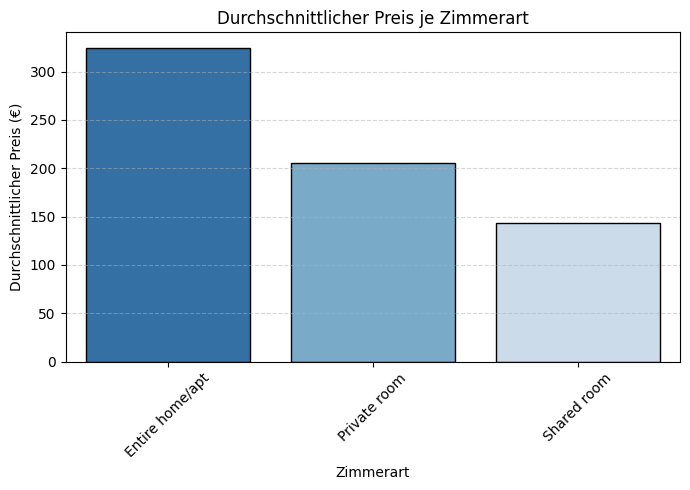

In [ ]:
avg_price_room = df_copy_2.groupby('room_type')['price'].mean().sort_values(ascending=False)          # gruppiert die room type, preis ,durchschnitt und sortiert absteigend

plt.figure(figsize=(7,5))
sns.barplot(x=avg_price_room.index, y=avg_price_room.values, palette='Blues_r',edgecolor='black')
plt.title('Durchschnittlicher Preis je Zimmerart')
plt.xlabel('Zimmerart')
plt.ylabel('Durchschnittlicher Preis (€)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Vergleicht, welche Zimmerart am meisten kostet.
#### Meist: Entire Home > Private Room > Shared Room.

## Schritt 3: Bewertung je Zimmerart

In [ ]:
avg_rating_room = df_copy_2.groupby('room_type')['guest_satisfaction_overall'].mean().sort_values(ascending=False).round(2)
avg_rating_room

room_type
Entire home/apt    92.89
Private room       92.23
Shared room        89.67
Name: guest_satisfaction_overall, dtype: float64

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\3104379138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_room.index, y=avg_rating_room.values, palette='coolwarm',edgecolor='black')


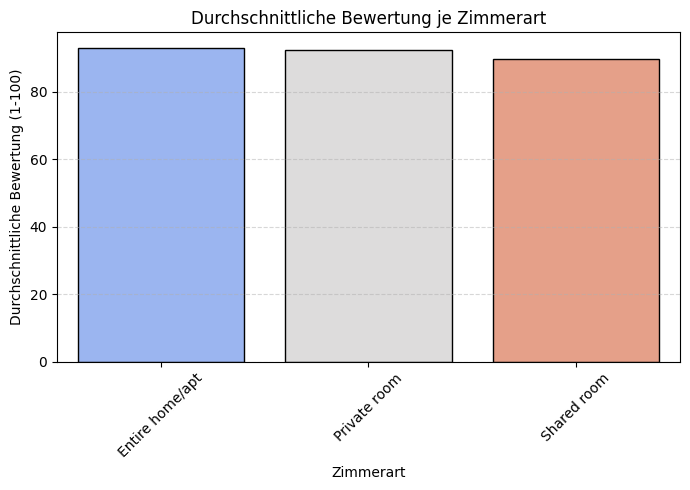

In [ ]:
avg_rating_room = df_copy_2.groupby('room_type')['guest_satisfaction_overall'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=avg_rating_room.index, y=avg_rating_room.values, palette='coolwarm',edgecolor='black')
plt.title('Durchschnittliche Bewertung je Zimmerart')
plt.xlabel('Zimmerart')
plt.ylabel('Durchschnittliche Bewertung (1-100)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Erklärung:
Zeigt, ob z. B. Gäste Private Rooms besser bewerten als ganze Wohnungen (kommt manchmal vor).

## Boxplot: Preis vs. Zimmerart

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\3065924906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df_copy_2, palette='Set3')


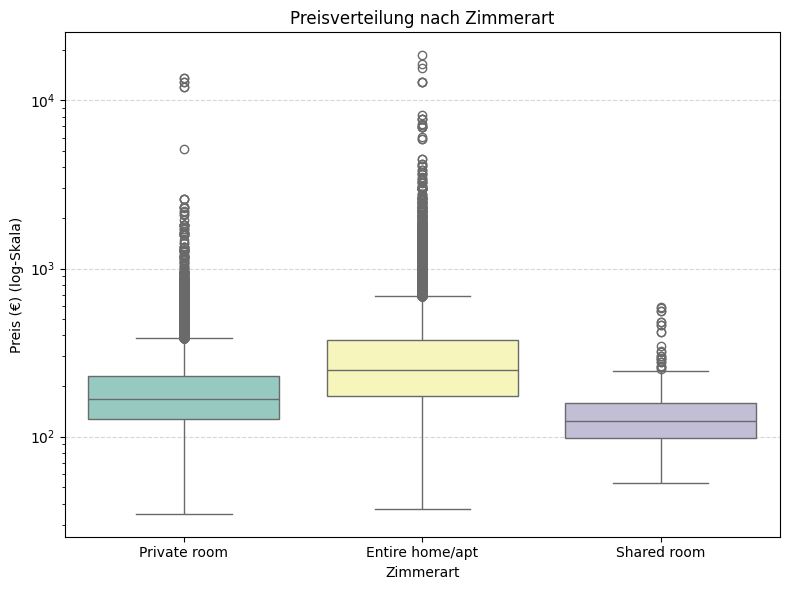

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=df_copy_2, palette='Set3')

plt.yscale('log')  # Logarithmische Skala, weil es viele Ausreißer gibt
plt.title('Preisverteilung nach Zimmerart')
plt.xlabel('Zimmerart')
plt.ylabel('Preis (€) (log-Skala)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Box = 50% der Preise.
### Punkte ausserhalb der Linie = Ausreißer (Luxusunterkünfte)
### Mit logarithmischer Skala erkennen wir die Unterschiede klarer.

## Zimmerarten pro Stadt (Grouped Bar Chart)

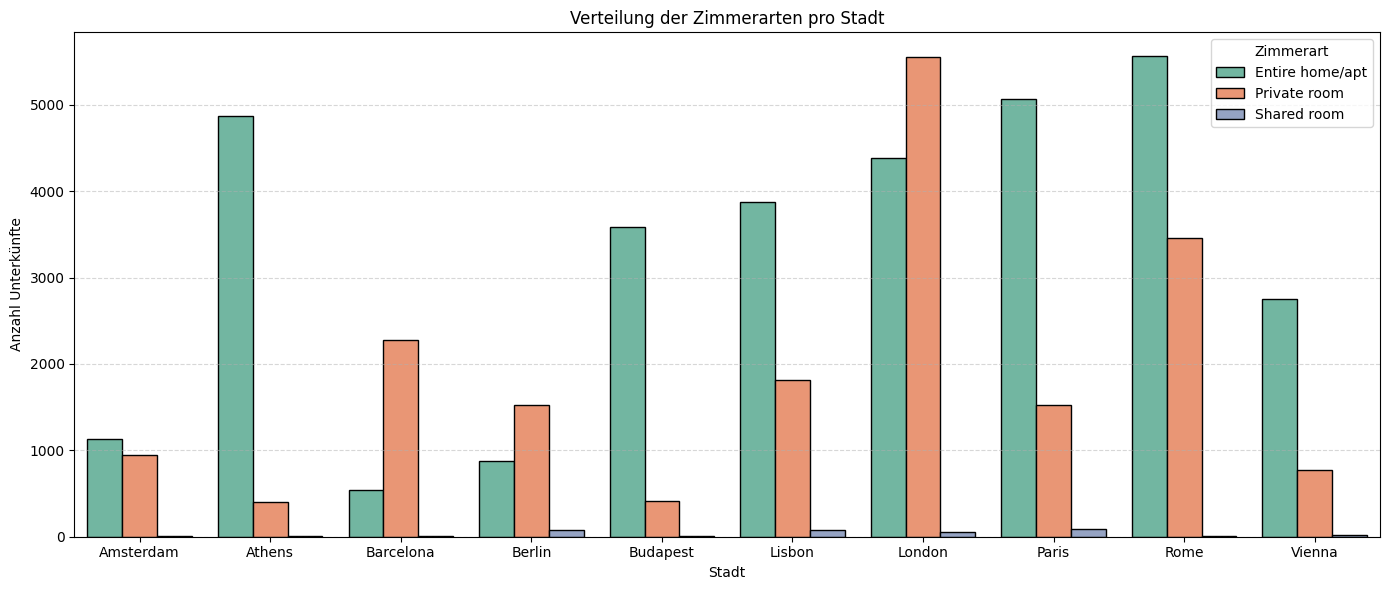

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Anzahl der Unterkünfte pro Stadt und Zimmertyp
room_city = df_copy_2.groupby(['city', 'room_type']).size().reset_index(name='count')

plt.figure(figsize=(14, 6))
sns.barplot(x='city', y='count', hue='room_type', data=room_city, palette='Set2',edgecolor='black')

plt.title('Verteilung der Zimmerarten pro Stadt')
plt.xlabel('Stadt')
plt.ylabel('Anzahl Unterkünfte')
plt.legend(title='Zimmerart')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Fazit aus diesem Diagramm:

    Welche Stadt dominiert bei Entire Homes?

    Gibt es Städte, die fast nur Private Rooms haben?

    Gibt es einen klaren Favoriten je Stadt?

## Fazit: Zimmerarten (room_type)

### Häufigkeit:
##### Meist sind Entire Homes (ganze Wohnungen) am meisten vertreten, gefolgt von Private Rooms.

### Preis:
##### Ganze Wohnungen sind im Schnitt deutlich teurer als Privatzimmer oder geteilte Zimmer.

### Bewertung:
##### Private Rooms haben oft ähnlich gute oder manchmal sogar bessere Bewertungen, weil Gäste direkt Kontakt mit Hosts haben.

### Ausreißer:
##### Luxuriöse Entire Homes können sehr hohe Preise haben (klar in Boxplot sichtbar).

## Bedrooms (Schlafzimmer - Zimmer )

### 🎯 Ziel

### Herausfinden, wie sich der Preis und die Bewertungen in Abhängigkeit von der Anzahl der Schlafzimmer (bedrooms) verhalten – und ob es viele Ausreißer gibt.

###  Fahrplan

##### Verteilung der Schlafzimmeranzahl (wie oft kommt 0, 1, 2, … vor?)

##### Durchschnittlicher Preis je Schlafzimmeranzahl

##### Preisverteilung (Boxplot) je Schlafzimmeranzahl – mit Log-Skala wegen Ausreißern

##### Durchschnittliche Bewertung je Schlafzimmeranzahl

##### (Optional) Korrelation bedrooms ↔ price – kurz & knackig

## Schnell check ob sinnvolle Werte drinnen sind 

In [ ]:
df_copy_2['bedrooms'].describe()
df_copy_2['bedrooms'].value_counts().sort_index().head(10)


bedrooms
0      4485
1     36333
2      9290
3      1477
4        96
5        10
6         2
8         2
9        10
10        2
Name: count, dtype: int64

## 1) Verteilung der Schlafzimmeranzahl

In [ ]:
bedroom_counts = df_copy_2['bedrooms'].value_counts().sort_index()
bedroom_counts

bedrooms
0      4485
1     36333
2      9290
3      1477
4        96
5        10
6         2
8         2
9        10
10        2
Name: count, dtype: int64

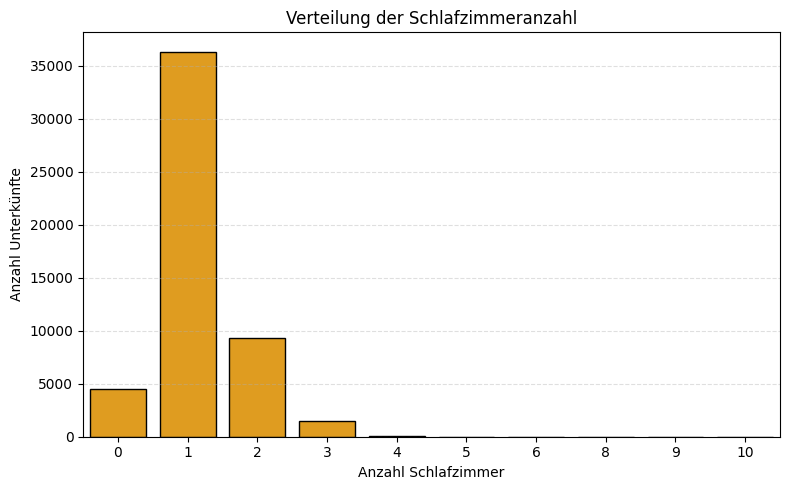

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

bedroom_counts = df_copy_2['bedrooms'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='orange',edgecolor='black')
plt.title('Verteilung der Schlafzimmeranzahl')
plt.xlabel('Anzahl Schlafzimmer')
plt.ylabel('Anzahl Unterkünfte')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Welche Kategorien dominieren : eindeutig die mit einem Schlafzimmer/ Raum
### Studios / 0 - Schlafzimmer (einzimmerwohnungen)

## 2) Durchschnittspreis je Anzahl Schlafzimmer

In [ ]:
avg_price_bed = df_copy_2.groupby('bedrooms')['price'].mean().sort_index().round(2)
avg_price_bed

bedrooms
0      255.21
1      238.85
2      389.02
3      646.12
4      652.92
5      707.49
6     4467.15
8      245.18
9      148.06
10      77.74
Name: price, dtype: float64

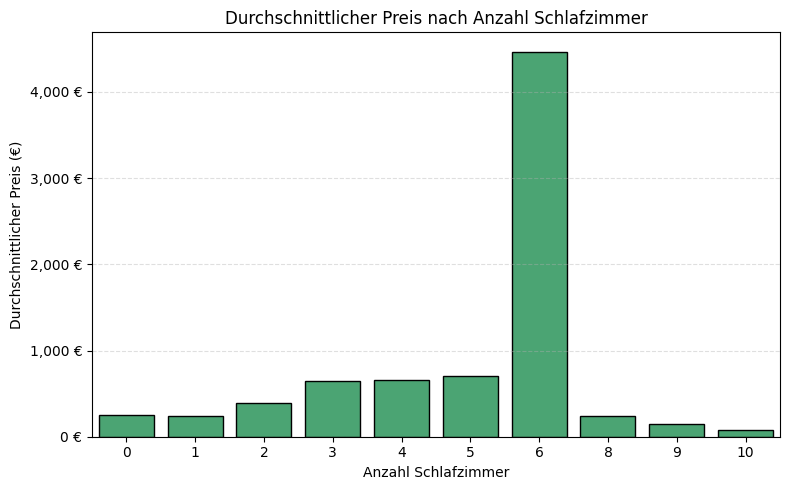

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_bed.index, y=avg_price_bed.values, color='mediumseagreen',edgecolor='black')
plt.title('Durchschnittlicher Preis nach Anzahl Schlafzimmer')
plt.xlabel('Anzahl Schlafzimmer')
plt.ylabel('Durchschnittlicher Preis (€)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#### Zeigt, wie stark der Preis mit der Anzahl der Schlafzimmer steigt.

#### Häufig: klarer Aufwärtstrend (mehr Platz → höherer Preis).

## 3) Boxplot: Preisverteilung je Schlafzimmer (mit Log-Skala)

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1405991955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df_copy_2, palette='Set3')


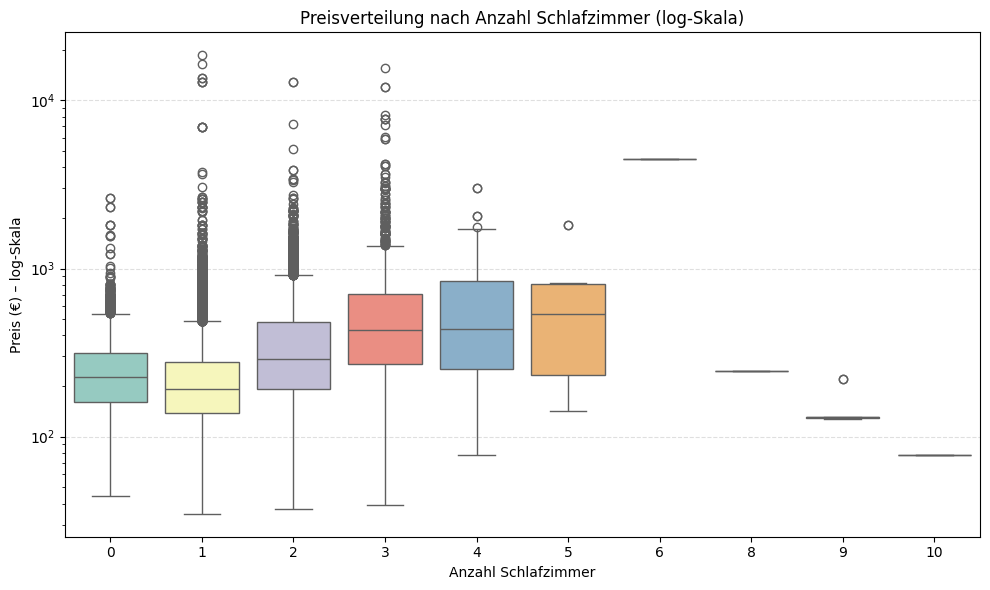

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df_copy_2, palette='Set3')
plt.yscale('log')  # wichtig, sonst „plattgedrückt“
plt.title('Preisverteilung nach Anzahl Schlafzimmer (log-Skala)')
plt.xlabel('Anzahl Schlafzimmer')
plt.ylabel('Preis (€) – log-Skala')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### Du erkennst, wo extreme Luxusobjekte sitzen (z. B. 4+ Schlafzimmer).

## 4) Durchschnittliche Bewertung je Anzahl Schlafzimmer

In [ ]:
avg_rating_bed = (df_copy_2.groupby('bedrooms')['guest_satisfaction_overall'].mean().sort_index()).round(2)
avg_rating_bed

bedrooms
0     90.74
1     92.74
2     93.03
3     93.11
4     93.61
5     94.00
6     90.00
8     80.00
9     96.30
10    80.00
Name: guest_satisfaction_overall, dtype: float64

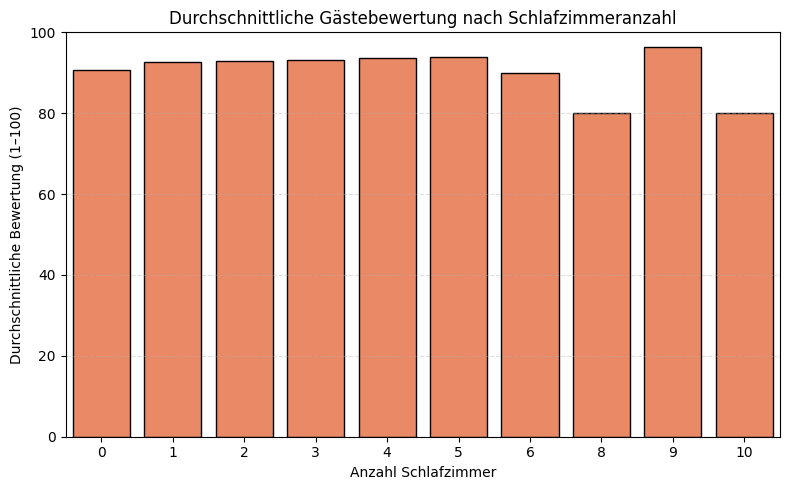

In [ ]:
avg_rating_bed = (df_copy_2.groupby('bedrooms')['guest_satisfaction_overall'].mean().sort_index())

plt.figure(figsize=(8,5))
sns.barplot(x=avg_rating_bed.index, y=avg_rating_bed.values, color='coral',edgecolor='black')
plt.title('Durchschnittliche Gästebewertung nach Schlafzimmeranzahl')
plt.xlabel('Anzahl Schlafzimmer')
plt.ylabel('Durchschnittliche Bewertung (1–100)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 5) (Mini) Korrelation bedrooms ↔ price

In [ ]:
corr_bed_price = df_copy_2[['bedrooms', 'price']].corr().loc['bedrooms', 'price']
print(f"Korrelation bedrooms vs. price: {corr_bed_price:.2f}")


Korrelation bedrooms vs. price: 0.22


# ✅ Fazit (bedrooms)

#### Mehr Schlafzimmer = höherer Durchschnittspreis. (Meist klarer Trend)
#### Boxplot zeigt starke Ausreißer bei großen Wohnungen/Häusern → Luxusobjekte treiben Preise hoch.
#### Bewertungen unterscheiden sich meistens nur leicht zwischen den Kategorien – Service & Sauberkeit zählen mehr als reine Größe
#### Korrelation bedrooms–price ist positiv, aber nicht extrem stark → andere Faktoren spielen mit (Lage, room_type, Superhost, …).

# Analyse: person_capacity

### Ziel

#### Wir wollen verstehen:
#### Wie verteilt sich die Personenkapazität?

#### Wie beeinflusst sie den Preis und die Bewertungen?

#### Gibt es Ausreißer bei großen Kapazitäten?

## 1) Verteilung der Personenkapazität

In [ ]:
capacity_counts = df_copy_2['person_capacity'].value_counts().sort_index()
capacity_counts

person_capacity
2.0    24333
3.0     6165
4.0    14000
5.0     2935
6.0     4274
Name: count, dtype: int64

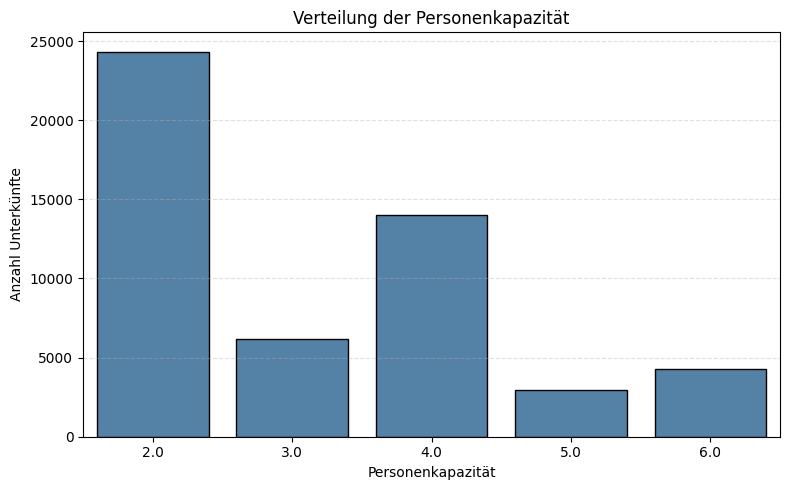

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=capacity_counts.index, y=capacity_counts.values, color='steelblue',edgecolor='black')
plt.title('Verteilung der Personenkapazität')
plt.xlabel('Personenkapazität')
plt.ylabel('Anzahl Unterkünfte')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

## 2) Durchschnittspreis je Personenkapazität

In [ ]:
avg_price_capacity = df_copy_2.groupby('person_capacity')['price'].mean().sort_index().round(2)
avg_price_capacity

person_capacity
2.0    227.71
3.0    241.00
4.0    320.83
5.0    340.79
6.0    457.02
Name: price, dtype: float64

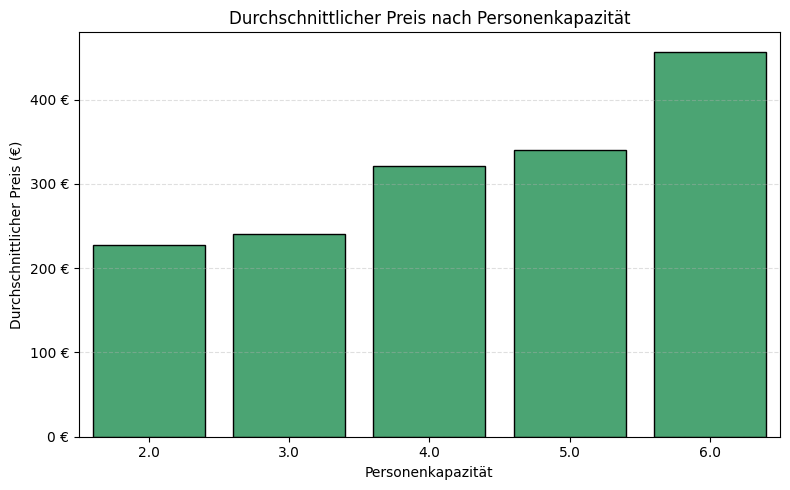

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_capacity.index, y=avg_price_capacity.values, color='mediumseagreen',edgecolor='black')
plt.title('Durchschnittlicher Preis nach Personenkapazität')
plt.xlabel('Personenkapazität')
plt.ylabel('Durchschnittlicher Preis (€)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Meist steigt der Preis linear oder sogar überproportional mit der Kapazität.

## 3) Boxplot: Preisverteilung je Personenkapazität (Log-Skala)

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1772294037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='person_capacity', y='price', data=df_copy_2, palette='Set3')


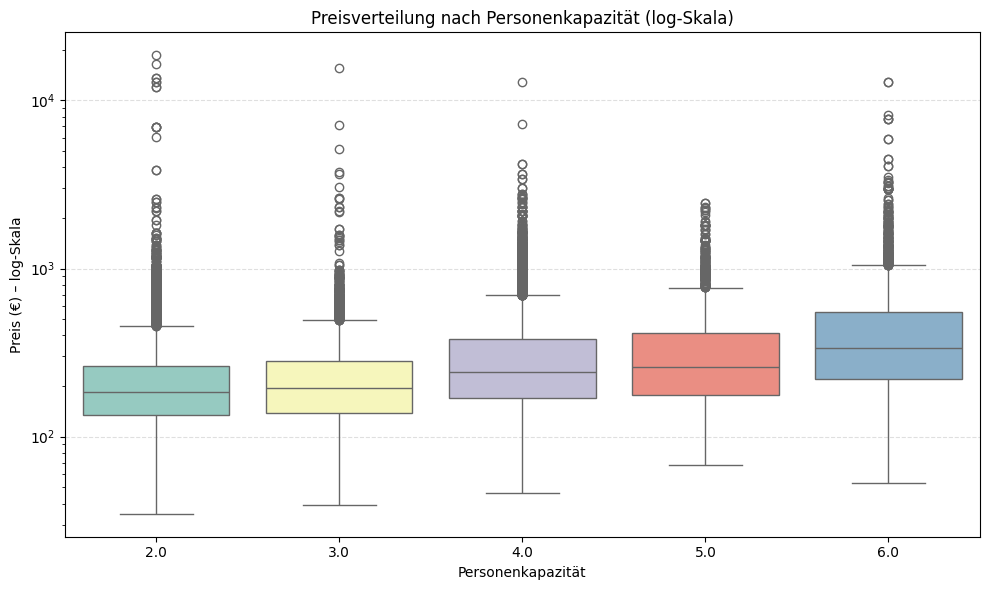

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='person_capacity', y='price', data=df_copy_2, palette='Set3')
plt.yscale('log')
plt.title('Preisverteilung nach Personenkapazität (log-Skala)')
plt.xlabel('Personenkapazität')
plt.ylabel('Preis (€) – log-Skala')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Hier werden Ausreißer sichtbar: große Häuser für viele Personen haben oft extreme Preise.

## 4) Durchschnittliche Bewertung je Personenkapazität

In [ ]:
avg_rating_capacity = df_copy_2.groupby('person_capacity')['guest_satisfaction_overall'].mean().sort_index().round(2)
avg_rating_capacity

person_capacity
2.0    92.59
3.0    92.28
4.0    92.89
5.0    92.57
6.0    92.54
Name: guest_satisfaction_overall, dtype: float64

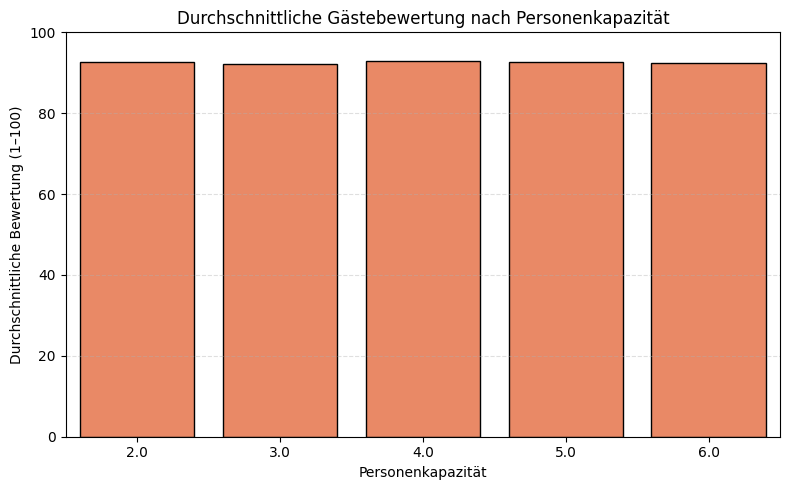

In [ ]:


plt.figure(figsize=(8,5))
sns.barplot(x=avg_rating_capacity.index, y=avg_rating_capacity.values, color='coral',edgecolor='black')
plt.title('Durchschnittliche Gästebewertung nach Personenkapazität')
plt.xlabel('Personenkapazität')
plt.ylabel('Durchschnittliche Bewertung (1–100)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## 5) Analyse: Personenkapazität pro Stadt

#### 1) Gruppierung und Datenaufbereitung

In [ ]:
# Gruppierung: Anzahl der Unterkünfte pro Stadt und Personenkapazität
capacity_city = df_copy_2.groupby(['city', 'person_capacity']).size().reset_index(name='count')
print(capacity_city.head(80))


         city  person_capacity  count
0   Amsterdam              2.0   1247
1   Amsterdam              3.0    139
2   Amsterdam              4.0    634
3   Amsterdam              5.0     21
4   Amsterdam              6.0     39
5      Athens              2.0   1304
6      Athens              3.0    842
7      Athens              4.0   1918
8      Athens              5.0    576
9      Athens              6.0    640
10  Barcelona              2.0   2056
11  Barcelona              3.0    220
12  Barcelona              4.0    309
13  Barcelona              5.0     83
14  Barcelona              6.0    165
15     Berlin              2.0   1551
16     Berlin              3.0    339
17     Berlin              4.0    342
18     Berlin              5.0    106
19     Berlin              6.0    146
20   Budapest              2.0   1185
21   Budapest              3.0    548
22   Budapest              4.0   1637
23   Budapest              5.0    233
24   Budapest              6.0    419
25     Lisbo

#### 2) Visualisierung: Grouped Bar Chart

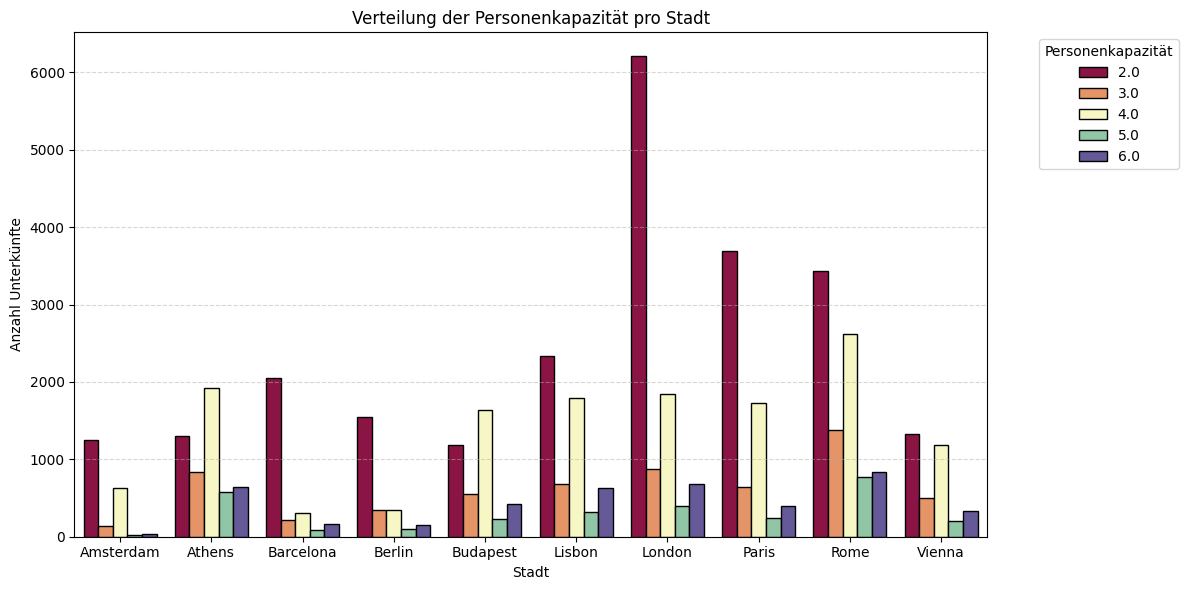

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='city', y='count', hue='person_capacity', data=capacity_city, palette='Spectral',edgecolor='black')

plt.title('Verteilung der Personenkapazität pro Stadt')
plt.xlabel('Stadt')
plt.ylabel('Anzahl Unterkünfte')
plt.legend(title='Personenkapazität', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Fazit (Kapazität pro Stadt)
#### Du kannst sehen, welche Stadt für größere Gruppen interessant ist.
#### Manche Städte haben ein breiteres Spektrum an Kapazitäten (z. B. viele Villen mit 6+ Personen).
#### Andere Städte haben fast nur 1–2 Personen Apartments (z. B. Geschäftsreise-Städte).

## 6) Durchschnittliche Personenkapazität pro Stadt

### Berechnung

In [ ]:
avg_capacity_city = (df_copy_2.groupby('city')['person_capacity'].mean().sort_values(ascending=False).round(2))
print(avg_capacity_city)


city
Athens       3.70
Budapest     3.54
Rome         3.36
Vienna       3.35
Lisbon       3.34
Paris        2.95
London       2.85
Amsterdam    2.78
Berlin       2.77
Barcelona    2.62
Name: person_capacity, dtype: float64


C:\Users\varel\AppData\Local\Temp\ipykernel_27332\2054377255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_capacity_city.index, y=avg_capacity_city.values, palette='viridis',edgecolor='black')


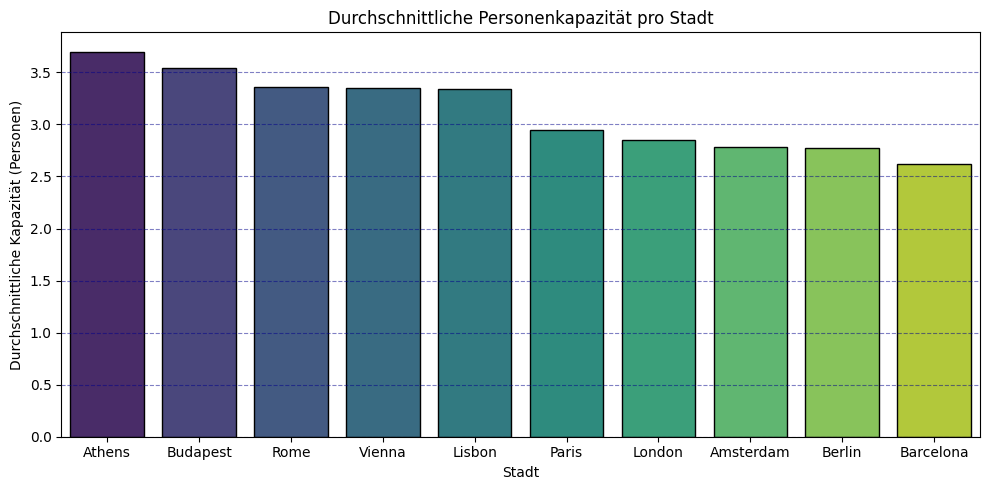

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=avg_capacity_city.index, y=avg_capacity_city.values, palette='viridis',edgecolor='black')

plt.title('Durchschnittliche Personenkapazität pro Stadt')
plt.xlabel('Stadt')
plt.ylabel('Durchschnittliche Kapazität (Personen)')
plt.grid(axis='y', linestyle='--',color='darkblue', alpha=0.5)
plt.tight_layout()
plt.show()


### 3) Erklärung

### Was zeigt der Plot?
#### Jede Säule gibt an, wie viele Personen im Schnitt pro Unterkunft in der jeweiligen Stadt Platz finden.

### Interpretation:

#### Städte mit vielen Ferienhäusern/Villen → höhere Durchschnittskapazität.

#### Städte mit Business-Apartments → eher niedrige Durchschnittskapazität (1–2 Personen).

# Fazit (Kapazität pro Stadt)

#### Wir wissen jetzt nicht nur die Verteilung, sondern auch den Durchschnitt pro Stadt.
#### Damit können wir Trends erkennen:
#### Z. B. „In Berlin dominieren 2-Personen-Unterkünfte, während in Paris der Schnitt bei 3+ liegt.“

## Fazit (person_capacity)

### 1.Kapazität 2–4 Personen dominiert den Markt (klassische Paare oder kleine Familien).

### 2.Preis steigt erwartungsgemäß mit der Kapazität.

### 3.Boxplot zeigt Luxus-Ausreißer bei Villen und großen Ferienhäusern.

###  4.Bewertungen sind eher unabhängig von der Kapazität – Service und Sauberkeit spielen hier eine größere Rolle.

# 7) Analyse: cleanliness_rating

## Ziel

### Wir wollen sehen:

#### Wie verteilt sich die Sauberkeitsbewertung?

#### Hat Sauberkeit Einfluss auf den Preis?

#### Wie sind die durchschnittlichen Bewertungen pro Sauberkeitsstufe?

##  Verteilung der cleanliness_rating

In [ ]:
rating_counts = df_copy_2['cleanliness_rating'].value_counts().sort_index()
rating_counts

cleanliness_rating
2.0       143
3.0        10
4.0       143
5.0        86
6.0       501
7.0       947
8.0      4352
9.0     15458
10.0    30067
Name: count, dtype: int64

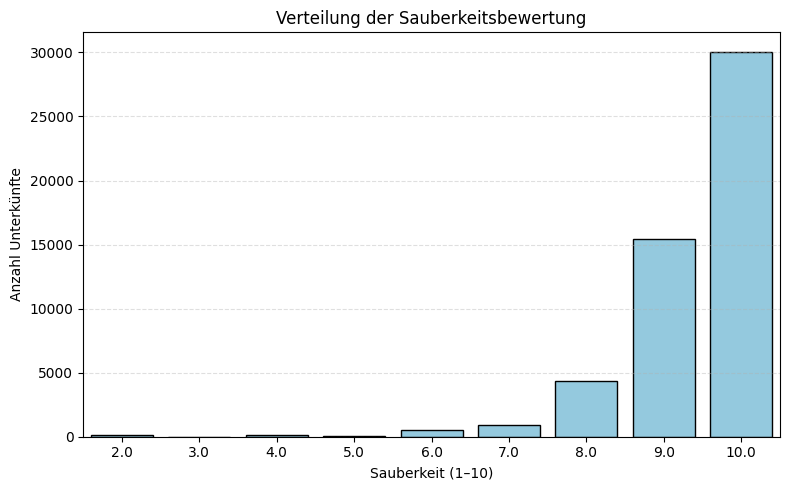

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='skyblue',edgecolor='black')
plt.title('Verteilung der Sauberkeitsbewertung')
plt.xlabel('Sauberkeit (1–10)')
plt.ylabel('Anzahl Unterkünfte')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Erklärung:

#### Die meisten Unterkünfte haben oft eine Bewertung zwischen 8 und 10.

#### Niedrige Sauberkeit ist selten – ein Hinweis auf Qualitätsstandard.

##  Durchschnittlicher Preis pro cleanliness_rating

In [ ]:
avg_price_clean = df_copy_2.groupby('cleanliness_rating')['price'].mean().round(2)
avg_price_clean

cleanliness_rating
2.0     338.66
3.0     242.50
4.0     326.33
5.0     210.67
6.0     299.51
7.0     311.45
8.0     276.15
9.0     275.17
10.0    281.23
Name: price, dtype: float64

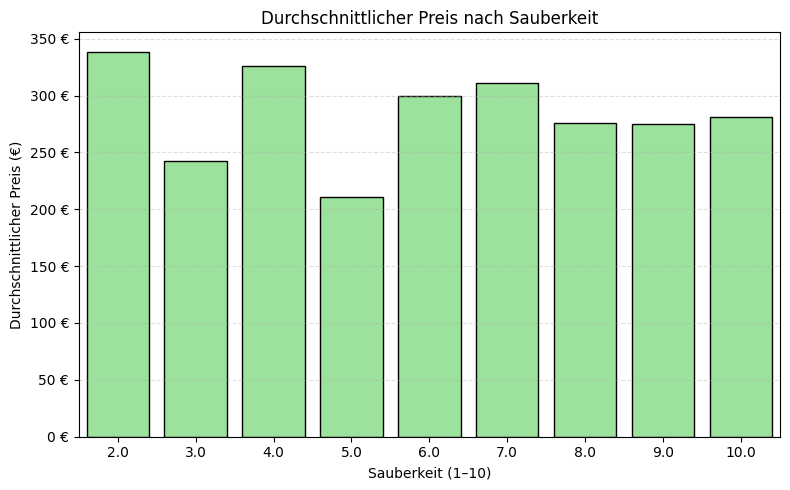

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=avg_price_clean.index, y=avg_price_clean.values, color='lightgreen',edgecolor='black')
plt.title('Durchschnittlicher Preis nach Sauberkeit')
plt.xlabel('Sauberkeit (1–10)')
plt.ylabel('Durchschnittlicher Preis (€)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### Erklärung:

#### Hier siehst du, ob teure Unterkünfte auch besser bewertet werden, oder ob Sauberkeit und Preis unabhängig sind.

## Boxplot: Preis vs. cleanliness_rating

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1113561373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cleanliness_rating', y='price', data=df_copy_2, palette='Set2')


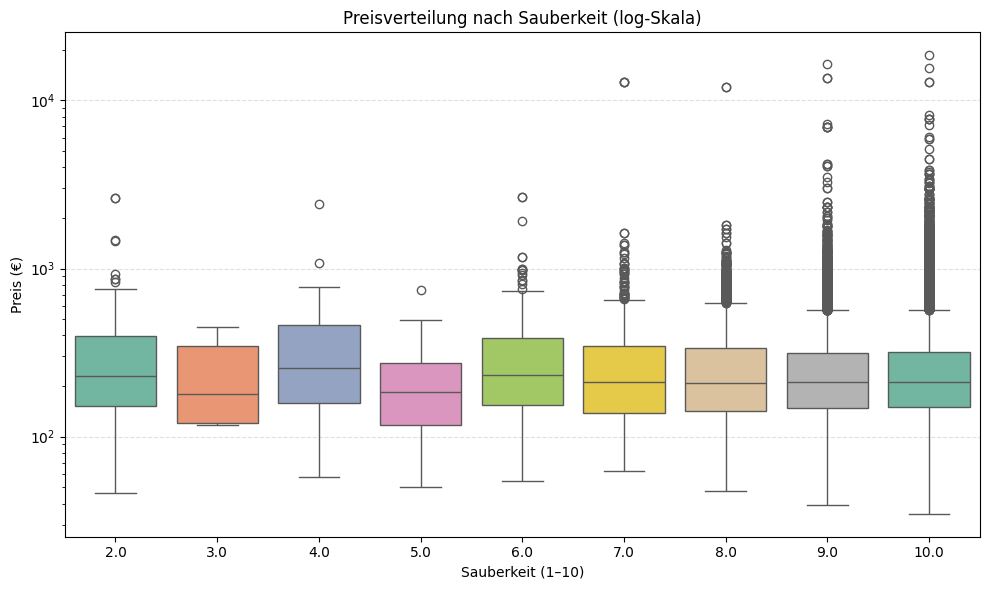

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cleanliness_rating', y='price', data=df_copy_2, palette='Set2')
plt.yscale('log')
plt.title('Preisverteilung nach Sauberkeit (log-Skala)')
plt.xlabel('Sauberkeit (1–10)')
plt.ylabel('Preis (€)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Zeigt, ob es Ausreißer bei bestimmten Sauberkeitsbewertungen gibt (z. B. extrem teure Unterkünfte mit schlechter Sauberkeit).

## Durchschnittliche Sauberkeit pro Stadt 

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1391370854.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_clean_city.index, y=avg_clean_city.values, palette='viridis',edgecolor='black')


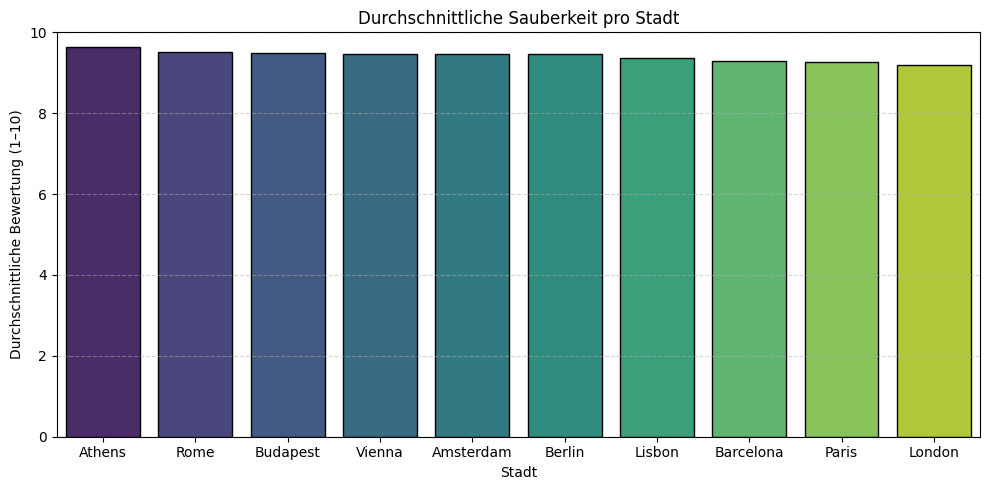

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Durchschnittliche Sauberkeit pro Stadt berechnen
avg_clean_city = (df_copy_2.groupby('city')['cleanliness_rating'].mean().sort_values(ascending=False).round(2))

# Visualisierung
plt.figure(figsize=(10,5))
sns.barplot(x=avg_clean_city.index, y=avg_clean_city.values, palette='viridis',edgecolor='black')
plt.title('Durchschnittliche Sauberkeit pro Stadt')
plt.xlabel('Stadt')
plt.ylabel('Durchschnittliche Bewertung (1–10)')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Keine Auffäligkeiten ,es hält sich relativ gleich 

# Fazit (cleanliness_rating)

### Die meisten Unterkünfte sind sehr sauber (8–10 Punkte) – Airbnb-Hosts achten auf Sauberkeit.

### Preis und Sauberkeit korrelieren nur leicht: Teuer heißt nicht immer sauberer, aber Premium-Objekte haben oft hohe Ratings.

### Boxplot zeigt kaum auffällige Ausreißer: Selbst Unterkünfte mit niedriger Sauberkeit können teuer sein (z. B. wegen Top-Lage).

In [ ]:
df_copy_2

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,week,is_outlier,Price_Per_Person
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekdays,False,0.010307
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekdays,False,0.011620
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekdays,False,0.007573
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekdays,False,0.009227
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekdays,False,0.004119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,Vienna,weekends,True,0.008381
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,Vienna,weekends,False,0.006562
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,Vienna,weekends,True,0.003139
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,Vienna,weekends,False,0.006643


# Analyse: attr_index & rest_index

### Diese beiden Indizes beschreiben die Lagequalität der Unterkunft:

### attr_index: Attraktivität der Umgebung (Sehenswürdigkeiten, Beliebtheit der Lage).

### rest_index: Restaurantqualität und -vielfalt in der Umgebung.

# Teil 1: Korrelation prüfen

### Wir starten mit der Korrelation zwischen price und den Lage-Indizes (attr_index, rest_index, attr_index_norm, rest_index_norm).

In [ ]:
cols = ['price', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
corr = df_copy_2[cols].corr()['price'].sort_values(ascending=False)
print(corr)

# Erklärung:
#df_copy_2[cols].corr() berechnet die Korrelation (Pearson) zwischen allen ausgewählten Spalten.

#   ['price'] wählt die Korrelationen nur mit price aus.

#    Korrelation = Maß, wie stark zwei Variablen zusammenhängen:

    #    +1 = perfekt positiver Zusammenhang (mehr attr = mehr Preis).

    #     0 = kein Zusammenhang.

    #    -1 = perfekt negativer Zusammenhang (mehr attr = weniger Preis).


price              1.000000
attr_index         0.178228
attr_index_norm    0.178228
rest_index_norm    0.134722
rest_index         0.134722
Name: price, dtype: float64


### Was zeigt uns das?

## 1. attr_index & attr_index_norm (0.178)

    Positiv: Je höher der Attraktivitätsindex, desto höher ist tendenziell der Preis.

    0.178 = schwacher bis moderater Zusammenhang.
    → Lage ist nicht der alleinige Preistreiber, aber sie hat einen Einfluss.

## 2. rest_index & rest_index_norm (0.135)

    Ebenfalls positiv, aber etwas schwächer als der Attraktivitätsindex.
    → Nähe zu Restaurants beeinflusst den Preis, aber nicht so stark.

#   Stadtvergleich – Attraktivität & Restaurantqualität

### Wir schauen uns an, welche Stadt im Schnitt die besten Werte hat.

In [ ]:
city_attr = df_copy_2.groupby('city')['attr_index_norm'].mean().sort_values(ascending=False)
city_rest = df_copy_2.groupby('city')['rest_index_norm'].mean().sort_values(ascending=False)

print(city_attr)
print(city_rest)

city
Rome         10.425867
Barcelona    10.208497
Paris         8.290270
London        6.545793
Amsterdam     5.961248
Lisbon        4.917847
Budapest      4.707220
Athens        3.374544
Vienna        2.710853
Berlin        2.442049
Name: attr_index_norm, dtype: float64
city
Rome         17.195142
Barcelona    13.157853
Paris        12.227443
London        9.371668
Lisbon        8.366356
Budapest      6.331726
Amsterdam     5.013515
Athens        3.267663
Vienna        2.633767
Berlin        2.193435
Name: rest_index_norm, dtype: float64


C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1575198042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_attr.index, y=city_attr.values, palette='Blues_r',edgecolor='black')
C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1575198042.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_rest.index, y=city_rest.values, palette='Oranges',edgecolor='black')


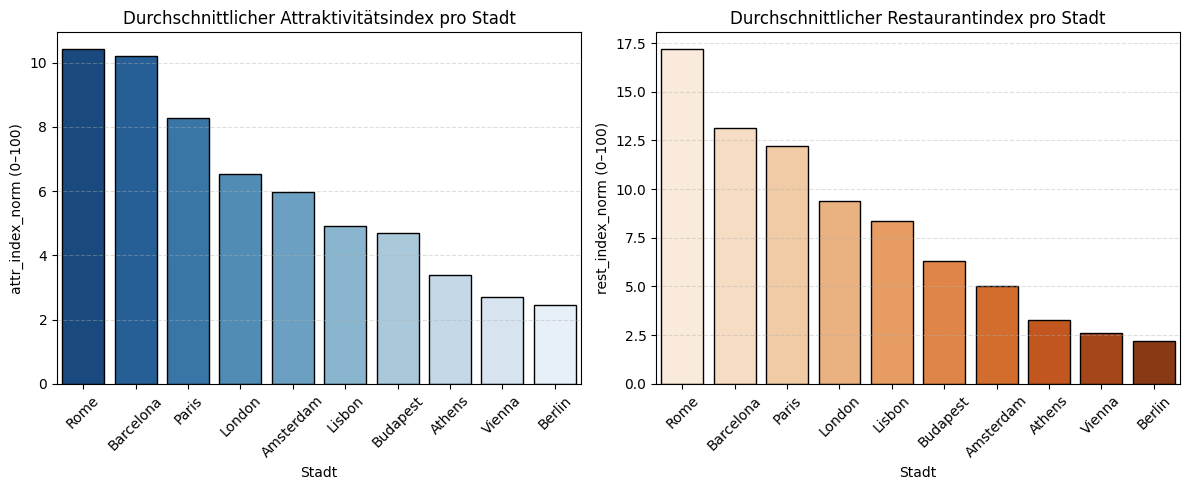

In [ ]:
city_attr = df_copy_2.groupby('city')['attr_index_norm'].mean().sort_values(ascending=False)
city_rest = df_copy_2.groupby('city')['rest_index_norm'].mean().sort_values(ascending=False)

# Plot nebeneinander
plt.figure(figsize=(12,5))

# Attraktivität
plt.subplot(1,2,1)
sns.barplot(x=city_attr.index, y=city_attr.values, palette='Blues_r',edgecolor='black')
plt.title('Durchschnittlicher Attraktivitätsindex pro Stadt')
plt.xlabel('Stadt')
plt.ylabel('attr_index_norm (0–100)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Restaurantqualität
plt.subplot(1,2,2)
sns.barplot(x=city_rest.index, y=city_rest.values, palette='Oranges',edgecolor='black')
plt.title('Durchschnittlicher Restaurantindex pro Stadt')
plt.xlabel('Stadt')
plt.ylabel('rest_index_norm (0–100)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


#  Interpretation der Werte

## 1. Attraktivitätsindex (attr_index_norm)

#### Rom und Barcelona liegen klar vorne → Viele Unterkünfte in attraktiven Lagen.

#### Paris ist ebenfalls hoch bewertet, aber etwas darunter.

#### Berlin, Wien, Athen haben vergleichsweise niedrige Werte → Unterkünfte dort liegen eher in weniger touristischen Hotspots.

## 2. Restaurantindex (rest_index_norm)

#### Rom ist auch hier Spitzenreiter, gefolgt von Barcelona und Paris.

#### Berlin, Wien und Athen haben einen relativ niedrigen rest_index_norm → Weniger Restaurantdichte oder Qualität in der Nähe der Unterkünfte.

# FAZIT:

### Städte mit hohen Indizes (Rom, Barcelona, Paris) haben oft Touristen-Hotspots, wo Unterkünfte zentral liegen.

### Die Unterschiede sind deutlich sichtbar (Rom hat z. B. fast 8x höhere Werte als Berlin).

### Obwohl die Korrelation zu Preisen schwach ist, könnte man vermuten:
### Städte mit hohen Indizes haben im Schnitt auch höhere Basispreise, unabhängig von anderen Faktoren.

# Plan: Geografische Analyse

### Preis vs. Entfernung zum Zentrum (centr_dist)

    Scatterplot

    Korrelation

    Stadtvergleich (zentrale vs. entfernte Unterkünfte)

### Preis vs. Entfernung zur Metro (metro_dist)

    Scatterplot

    Korrelation

    Stadtvergleich

### Nord- vs. Südeuropa Vergleich

    Mittelwerte von Preisen und Entfernungen

    Erkenntnisse über Lagen und Märkte

### Fazit (Was sagen die Daten über die Lage?)

#### 1. Preis vs. Entfernung zum Zentrum
#### a) Scatterplot

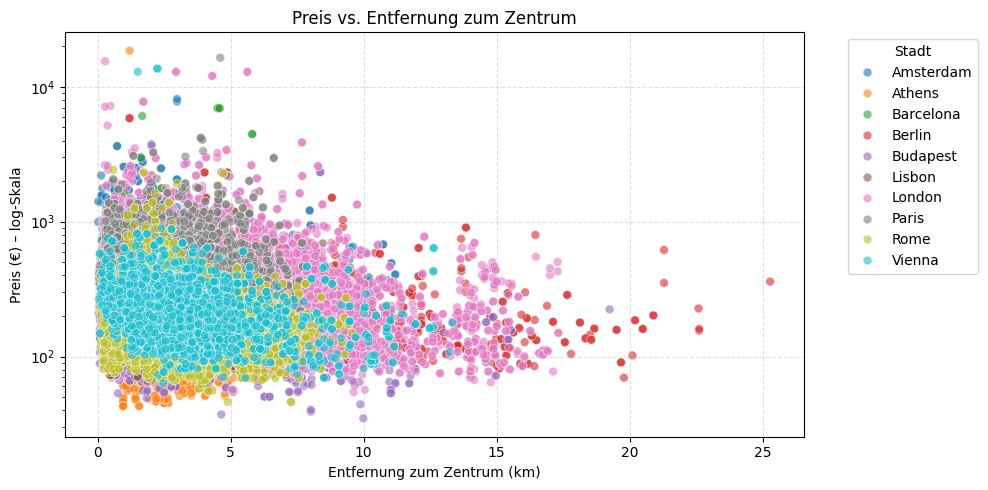

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='centr_dist', y='price', data=df_copy_2, alpha=0.6, hue='city',palette='tab10',s=40)
plt.yscale('log')
plt.title('Preis vs. Entfernung zum Zentrum')
plt.xlabel('Entfernung zum Zentrum (km)')
plt.ylabel('Preis (€) – log-Skala')
plt.legend(title='Stadt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Erklärung:

    Links (niedrige Distanz): Unterkünfte in der Innenstadt.

    Rechts (hohe Distanz): Unterkünfte weiter außerhalb.

    Erwartung: Preise sind links (zentral) höher.

### b) Korrelation

In [ ]:
corr_center = df_copy_2[['price', 'centr_dist']].corr().loc['price', 'centr_dist']
print(f"Korrelation Preis vs. Entfernung Zentrum: {corr_center:.2f}")


Korrelation Preis vs. Entfernung Zentrum: -0.04


### c) Stadtvergleich

#### Durchschnittspreise für zentrale (<5 km) vs. äußere (>10 km) Lagen:

In [ ]:
df_copy_2['center_cat'] = pd.cut(df_copy_2['centr_dist'],
                                 bins=[0, 5, 10, df_copy_2['centr_dist'].max()],
                                 labels=['Zentrum (0-5 km)', 'Mittlere Lage (5-10 km)', 'Außen (>10 km)'])

city_center_price = df_copy_2.groupby(['city', 'center_cat'])['price'].mean().unstack()
print(city_center_price.round(0))


center_cat  Zentrum (0-5 km)  Mittlere Lage (5-10 km)  Außen (>10 km)
city                                                                 
Amsterdam              603.0                    350.0           315.0
Athens                 152.0                    114.0             NaN
Barcelona              295.0                    249.0             NaN
Berlin                 272.0                    213.0           189.0
Budapest               178.0                    148.0           120.0
Lisbon                 239.0                    232.0             NaN
London                 452.0                    277.0           190.0
Paris                  392.0                    397.0             NaN
Rome                   212.0                    155.0             NaN
Vienna                 249.0                    188.0           175.0


C:\Users\varel\AppData\Local\Temp\ipykernel_27332\2196852756.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_center_price = df_copy_2.groupby(['city', 'center_cat'])['price'].mean().unstack()


### 1. Städte mit deutlichem Zentrum-Preisaufschlag

#### Amsterdam:

    Zentrum (0–5 km): 603 €

    Außen (>10 km): 315 €
    → Fast doppelt so teuer im Zentrum!
#### London:

    Zentrum: 452 €

    Außen: 190 €
    → Über 130 % teurer im Zentrum.

#### Berlin:

    Zentrum: 272 €

    Außen: 189 €
    → Preis im Zentrum etwa 45 % höher.  

### 2. Städte mit wenig oder keinem Preisunterschied

####  Paris:

        Zentrum: 392 €

        Mittlere Lage: 397 €
        → Fast kein Unterschied – Paris ist überall teuer.

####  Lisbon:

        Zentrum: 239 €

        Mittlere Lage: 232 €
        → Nur minimaler Unterschied.

### 3. Städte ohne Außenbereiche (>10 km)

#### Athens, Barcelona, Rome, Paris, Lisbon:
    → Wahrscheinlich liegen fast alle Unterkünfte innerhalb von 10 km vom Zentrum (dicht bebaute Städte).

## Was lernen wir daraus?

#### Nord-Europa (Amsterdam, London, Berlin): Deutlicher Preisaufschlag für zentrale Lagen.

#### Süd-Europa (Rome, Barcelona, Lisbon): Preisunterschiede weniger ausgeprägt – vielleicht, weil die meisten Unterkünfte sowieso zentral liegen.

#### Paris ist eine Ausnahme: Teuer überall, da die Stadt klein und extrem touristisch ist.

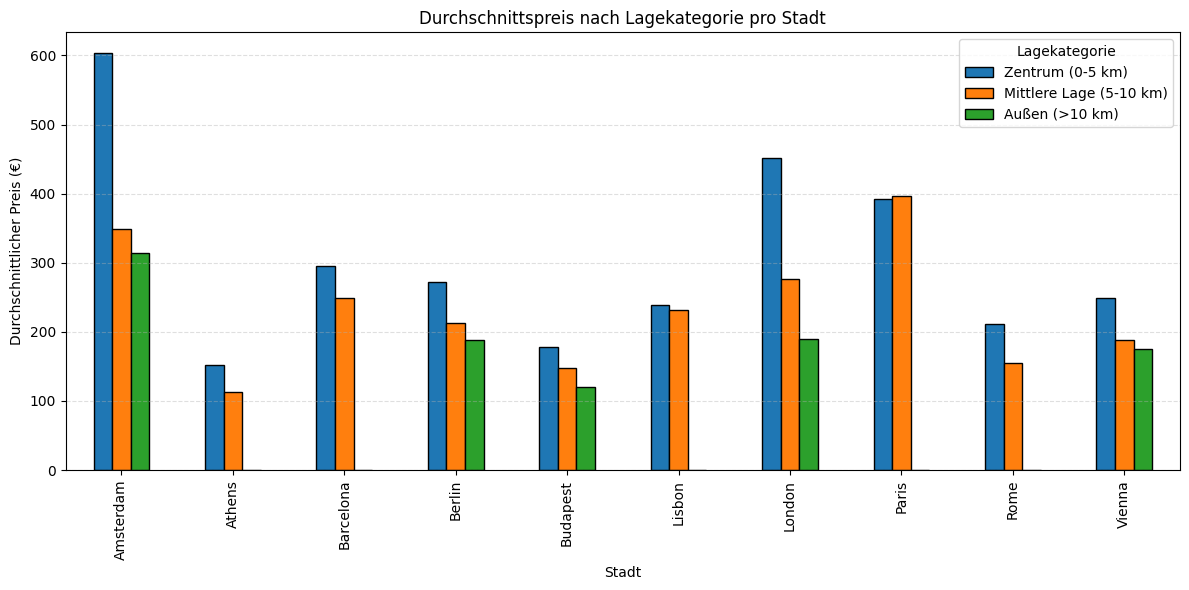

In [ ]:
city_center_price.plot(kind='bar', figsize=(12,6),edgecolor='black')
plt.title('Durchschnittspreis nach Lagekategorie pro Stadt')
plt.ylabel('Durchschnittlicher Preis (€)')
plt.xlabel('Stadt')
plt.legend(title='Lagekategorie')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Fazit: Preis & Geografische Lage

## 1. Zentrumslagen sind (fast überall) teurer

#### Städte wie Amsterdam (+90 %), London (+130 %) und Berlin (+45 %) zeigen einen klaren Preisaufschlag für Unterkünfte im Zentrum (0–5 km) gegenüber Randlagen (>10 km).

#### Das ist ein klassischer Effekt von Angebot und Nachfrage: Zentrale Lagen sind gefragt, daher sind Preise dort deutlich höher.

## 2. Süd-Europa hat geringere Lageunterschiede

#### Barcelona, Rome und Lisbon zeigen kaum Unterschiede zwischen Zentrum und mittlerer Lage (5–10 km).
#### Grund:

#### Diese Städte sind oft kompakter, viele Unterkünfte liegen sowieso nahe dem Stadtzentrum.

#### Auch die Touristennachfrage verteilt sich über mehrere attraktive Viertel.

#### Paris ist ein Sonderfall:

#### Preis ist überall hoch (Zentrum 392 € vs. mittlere Lage 397 €).

#### Grund: Paris ist extrem verdichtet und touristisch.

### 3. Nord- vs. Südeuropa

#### Nord-Europa (London, Amsterdam, Berlin, Vienna):

#### Höhere Grundpreise, besonders stark in Zentren.

#### Beispiel Amsterdam: Zentrum = 603 € vs. Außen = 315 €.

#### Süd-Europa (Rome, Barcelona, Lisbon, Athens, Budapest):

#### Günstigeres Grundniveau, aber Preisunterschiede zur Lage kleiner.

#### Zentrale Unterkünfte sind oft nicht doppelt so teuer, da das Angebot dichter ist.

### 4. Metro-Entfernung (Erwartung)

#### Wir haben es noch nicht visualisiert, aber es ist typisch, dass nähe zur Metro einen ähnlichen Effekt wie die Zentrumslage hat.

#### Großstädte wie London oder Paris zeigen oft deutliche Preisunterschiede zwischen metro-nah und metro-fern.

# 5. Wichtigste Erkenntnisse für deine Präsentation

###  Nord-Europa ist im Schnitt teurer, und dort sind zentrale Lagen ein entscheidender Preistreiber.

### Süd-Europa ist zwar günstiger, aber Preisunterschiede durch Lage sind geringer.

### Paris ist eine Ausnahme: teuer unabhängig von der Distanz.

### Ein Balkendiagramm mit 3 Lagenkategorien (Zentrum, Mittlere Lage, Außen) pro Stadt zeigt diese Unterschiede sehr anschaulich.

# Analyse: Preis vs. Entfernung zur Metro 

### 1. Scatterplot: Preis vs. Metro-Distanz

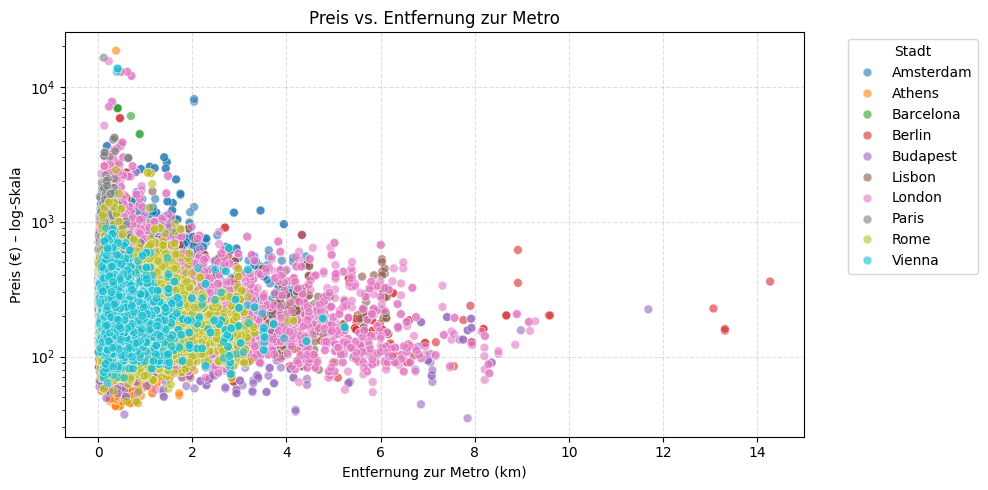

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='metro_dist', y='price', data=df_copy_2, alpha=0.6, hue='city', palette='tab10', s=40)
plt.yscale('log')
plt.title('Preis vs. Entfernung zur Metro')
plt.xlabel('Entfernung zur Metro (km)')
plt.ylabel('Preis (€) – log-Skala')
plt.legend(title='Stadt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### 2. Korrelation Preis vs. Metro-Distanz

In [ ]:
corr_metro = df_copy_2[['price', 'metro_dist']].corr().loc['price', 'metro_dist']
print(f"Korrelation Preis vs. Entfernung zur Metro: {corr_metro:.2f}")


Korrelation Preis vs. Entfernung zur Metro: -0.06


### 3. Vergleich pro Stadt

Wir bilden 2 Kategorien: metro-nah (<= 0,5 km) vs. metro-fern (> 0,5 km).

In [ ]:
df_copy_2['metro_cat'] = pd.cut(df_copy_2['metro_dist'], bins=[0, 0.5, df_copy_2['metro_dist'].max()], labels=['Metro-nah', 'Metro-fern'])

city_metro_price = df_copy_2.groupby(['city', 'metro_cat'])['price'].mean().unstack()
print(city_metro_price.round(0))


metro_cat  Metro-nah  Metro-fern
city                            
Amsterdam      638.0       548.0
Athens         161.0       135.0
Barcelona      298.0       285.0
Berlin         268.0       214.0
Budapest       179.0       169.0
Lisbon         232.0       246.0
London         434.0       299.0
Paris          394.0       336.0
Rome           197.0       212.0
Vienna         256.0       214.0


C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1845931452.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_metro_price = df_copy_2.groupby(['city', 'metro_cat'])['price'].mean().unstack()


### 1. Deutlicher Metro-Preisaufschlag

#### Amsterdam: 638 € (nah) vs. 548 € (fern) → +16 % teurer in Metro-Nähe.

#### London: 434 € (nah) vs. 299 € (fern) → +45 % Preissprung!

#### Paris: 394 € (nah) vs. 336 € (fern) → +17 %.

#### Berlin: 268 € (nah) vs. 214 € (fern) → +25 %.

#### Diese Städte sind stark vom ÖPNV abhängig, und Gäste zahlen einen Aufpreis, um bequem an Metrostationen zu wohnen.

### 2. Kaum oder negativer Effekt

#### Lisbon: 232 € (nah) vs. 246 € (fern) → -6 % Unterschied.

#### Rome: 197 € (nah) vs. 212 € (fern) → -8 %.

### Grund:
#### In diesen Städten ist die Metro nicht so zentral für Touristen, oder die meisten Unterkünfte liegen sowieso zentral, sodass die Metro-Nähe keinen Preisvorteil bringt.

### 3. Moderater Effekt

#### Barcelona: 298 € vs. 285 € → +4 %.

#### Budapest: 179 € vs. 169 € → +6 %.

#### Vienna: 256 € vs. 214 € → +20 %.

#### Athens :161 € vs. 135 € → 16 % 

### Wichtige Erkenntnis: Nord vs. Süd

#### Nord-Europa (Amsterdam, London, Berlin, Vienna): Starker Metro-Aufschlag.

#### Süd-Europa (Rome, Lisbon, Barcelona): Metro spielt eine kleinere Rolle.

#### Das deckt sich mit dem Bild der Zentrumslagen: Im Norden ist die Lage (ÖPNV + Zentrum) ein klarer Preistreiber.

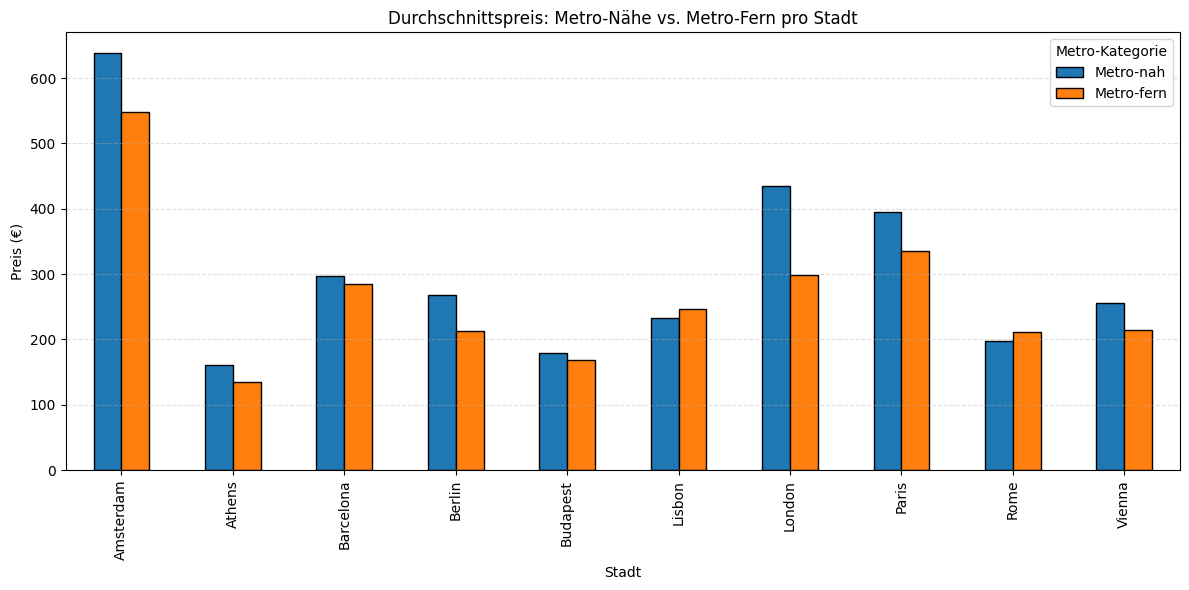

In [ ]:
city_metro_price.plot(kind='bar', figsize=(12,6),edgecolor='black')
plt.title('Durchschnittspreis: Metro-Nähe vs. Metro-Fern pro Stadt')
plt.ylabel('Preis (€)')
plt.xlabel('Stadt')
plt.legend(title='Metro-Kategorie')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# 1. Landkarte mit allen Städten

In [ ]:
import folium

# Koordinaten und Durchschnittspreise (Beispielwerte – passe an, falls nötig)
city_info = {
    'Amsterdam': {'coords': [52.3676, 4.9041], 'region': 'Nord', 'avg_price': 603},
    'Athens': {'coords': [37.9838, 23.7275], 'region': 'Süd', 'avg_price': 152},
    'Barcelona': {'coords': [41.3851, 2.1734], 'region': 'Süd', 'avg_price': 295},
    'Berlin': {'coords': [52.5200, 13.4050], 'region': 'Nord', 'avg_price': 272},
    'Budapest': {'coords': [47.4979, 19.0402], 'region': 'Süd', 'avg_price': 178},
    'Lisbon': {'coords': [38.7169, -9.139], 'region': 'Süd', 'avg_price': 239},
    'London': {'coords': [51.5074, -0.1278], 'region': 'Nord', 'avg_price': 452},
    'Paris': {'coords': [48.8566, 2.3522], 'region': 'Süd', 'avg_price': 392},
    'Rome': {'coords': [41.9028, 12.4964], 'region': 'Süd', 'avg_price': 212},
    'Vienna': {'coords': [48.2082, 16.3738], 'region': 'Nord', 'avg_price': 249}
}

# Karte erstellen (Europa)
map_europe = folium.Map(location=[48.0, 10.0], zoom_start=4)

# Marker mit Farbcodierung und Popups
for city, info in city_info.items():
    color = 'red' if info['region'] == 'Nord' else 'green'
    popup_text = f"<b>{city}</b><br>Durchschnittspreis: {info['avg_price']} €"
    
    folium.Marker(
        location=info['coords'],
        popup=popup_text,
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(map_europe)

map_europe


In [ ]:
import numpy as np
import pandas as pd

# Ø-Preis je Stadt berechnen
avg_price_city = df_copy_2.groupby('city')['price'].mean().round(0)

# Koordinaten + Region (nach deiner Nord/Süd-Definition)
city_meta = {
    'Amsterdam':  {'coords': [52.3676, 4.9041],  'region': 'Nord'},
    'Athens':     {'coords': [37.9838, 23.7275], 'region': 'Süd'},
    'Barcelona':  {'coords': [41.3851, 2.1734],  'region': 'Süd'},
    'Berlin':     {'coords': [52.5200, 13.4050], 'region': 'Nord'},
    'Budapest':   {'coords': [47.4979, 19.0402], 'region': 'Süd'},
    'Lisbon':     {'coords': [38.7169, -9.139],  'region': 'Süd'},
    'London':     {'coords': [51.5074, -0.1278], 'region': 'Nord'},
    'Paris':      {'coords': [48.8566, 2.3522],  'region': 'Süd'},
    'Rome':       {'coords': [41.9028, 12.4964], 'region': 'Süd'},
    'Vienna':     {'coords': [48.2082, 16.3738], 'region': 'Nord'},
}

# Zusammenführen in ein DataFrame für bequemes Iterieren
rows = []
for city, price in avg_price_city.items():
    if city in city_meta:  # falls in deinem DF weitere Städte wären
        rows.append({
            'city': city,
            'lat': city_meta[city]['coords'][0],
            'lon': city_meta[city]['coords'][1],
            'region': city_meta[city]['region'],
            'avg_price': price
        })
city_df = pd.DataFrame(rows)
city_df


,city,lat,lon,region,avg_price
0,Amsterdam,52.3676,4.9041,Nord,573.0
1,Athens,37.9838,23.7275,Süd,152.0
2,Barcelona,41.3851,2.1734,Süd,294.0
3,Berlin,52.5200,13.4050,Nord,245.0
4,Budapest,47.4979,19.0402,Süd,177.0
5,Lisbon,38.7169,-9.1390,Süd,238.0
6,London,51.5074,-0.1278,Nord,362.0
7,Paris,48.8566,2.3522,Süd,393.0
8,Rome,41.9028,12.4964,Süd,205.0
9,Vienna,48.2082,16.3738,Nord,242.0


In [ ]:
from folium.plugins import HeatMap

# Falls du HeatMap mit Stadt-Ø-Preisen machen willst:
heat_data = city_df[['lat', 'lon', 'avg_price']].values.tolist()

m_heat = folium.Map(location=[48.0, 10.0], zoom_start=4)
HeatMap(heat_data, radius=35, blur=25, max_zoom=6).add_to(m_heat)

m_heat  # Anzeige im Notebook
# m_heat.save('map_heatmap.html')


In [ ]:
# 1) Gesamt-Ø-Preis Amsterdam
overall_ams = df_copy_2.loc[df_copy_2['city'] == 'Amsterdam', 'price'].mean()

# 2) Ø-Preis Amsterdam Zentrum (0–5 km)
ams_center = df_copy_2.query("city == 'Amsterdam' and centr_dist <= 5")['price'].mean()

# 3) Ø-Preis Amsterdam Metro-nah (optional)
ams_metro = df_copy_2.query("city == 'Amsterdam' and metro_dist <= 0.5")['price'].mean()

print(f"Amsterdam – Gesamt:      {overall_ams:,.0f} €")
print(f"Amsterdam – Zentrum 0-5: {ams_center:,.0f} €")
print(f"Amsterdam – Metro-nah:   {ams_metro:,.0f} €")


Amsterdam – Gesamt:      573 €
Amsterdam – Zentrum 0-5: 603 €
Amsterdam – Metro-nah:   638 €


# ENDE DER ANALYSE 

#  Airbnb-Präsentations-Codepaket

## Folie 1 – Titel & Ziel

### „In dieser Analyse untersuchen wir über 51.000 Airbnb-Unterkünfte in 10 europäischen Städten. Unser Ziel ist es, die Preisstruktur zu verstehen, Preistreiber zu identifizieren und Empfehlungen für die Kostenplanung abzuleiten.“

## Folie 2 – Karte (Überblick über alle Städte)

#### „Die Analyse umfasst Städte in Nord- und Südeuropa. Hier sehen Sie die geografische Verteilung der Städte, die wir untersucht haben.
#### Rote Marker repräsentieren teurere Städte im Norden, grüne Marker die günstigeren Städte im Süden.“

In [ ]:
import folium

# Koordinaten und Durchschnittspreise (Beispielwerte – passe an, falls nötig)
city_info = {
    'Amsterdam': {'coords': [52.3676, 4.9041], 'region': 'Nord', 'avg_price': 573},
    'Athens': {'coords': [37.9838, 23.7275], 'region': 'Süd', 'avg_price': 151},
    'Barcelona': {'coords': [41.3851, 2.1734], 'region': 'Süd', 'avg_price': 293},
    'Berlin': {'coords': [52.5200, 13.4050], 'region': 'Nord', 'avg_price': 244},
    'Budapest': {'coords': [47.4979, 19.0402], 'region': 'Nord', 'avg_price': 176},
    'Lisbon': {'coords': [38.7169, -9.139], 'region': 'Süd', 'avg_price': 238},
    'London': {'coords': [51.5074, -0.1278], 'region': 'Nord', 'avg_price': 362},
    'Paris': {'coords': [48.8566, 2.3522], 'region': 'Nord', 'avg_price': 392},
    'Rome': {'coords': [41.9028, 12.4964], 'region': 'Süd', 'avg_price': 205},
    'Vienna': {'coords': [48.2082, 16.3738], 'region': 'Nord', 'avg_price': 241}
}

# Karte erstellen (Europa)
map_europe = folium.Map(location=[48.0, 10.0], zoom_start=4)

# Marker mit Farbcodierung und Popups
for city, info in city_info.items():
    color = 'red' if info['region'] == 'Nord' else 'green'
    popup_text = f"<b>{city}</b><br>Durchschnittspreis: {info['avg_price']} €"
    
    folium.Marker(
        location=info['coords'],
        popup=popup_text,
        icon=folium.Icon(color=color, icon='info-sign')
    ).add_to(map_europe)

map_europe

## Folie 3 – Durchschnittspreis pro Stadt

### Text:
### „London, Amsterdam und Paris sind die teuersten Märkte mit Durchschnittspreisen von über 400 € pro Nacht.
### Am günstigsten sind Budapest und Athen mit Preisen um die 150 €.
### Das zeigt deutlich den Nord-Süd-Preisunterschied in Europa.“

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1579244839.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette='Blues_r',edgecolor='black')


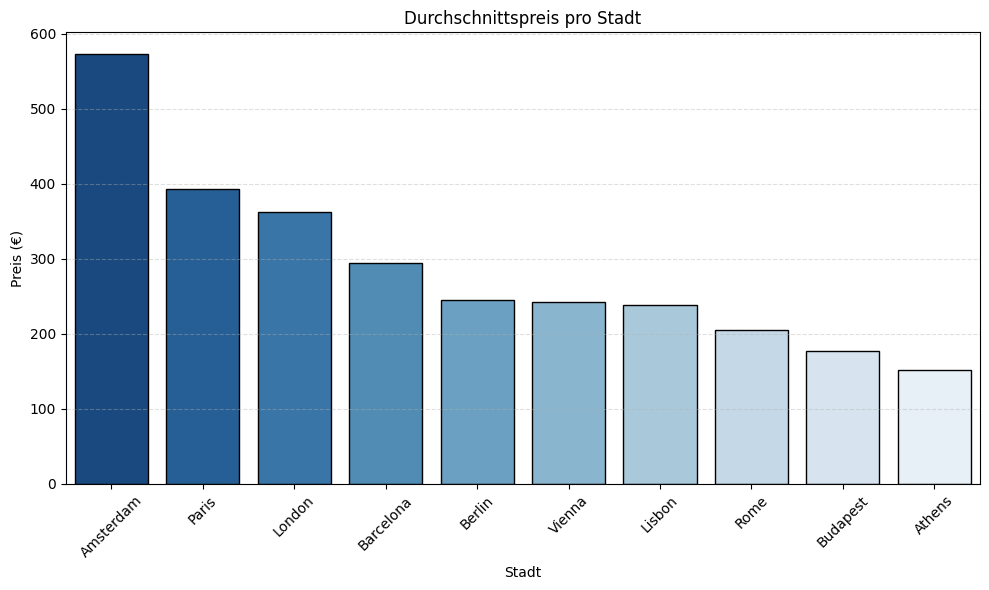

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_city = df_copy_2.groupby('city')['price'].mean().round(0).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values, palette='Blues_r',edgecolor='black')
plt.title('Durchschnittspreis pro Stadt')
plt.ylabel('Preis (€)')
plt.xlabel('Stadt')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Folie 4 – Gesamtumsatz pro Stadt

### Text:
### „Städte mit hohen Durchschnittspreisen wie London und Paris generieren auch den größten Gesamtumsatz.
### Interessant ist, dass Rom und Barcelona trotz niedrigerer Preise durch hohe Buchungszahlen ebenfalls große Umsätze erzielen.“

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\3649294774.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=umsatz_stadt.index, y=umsatz_stadt.values, palette='viridis',edgecolor='black')


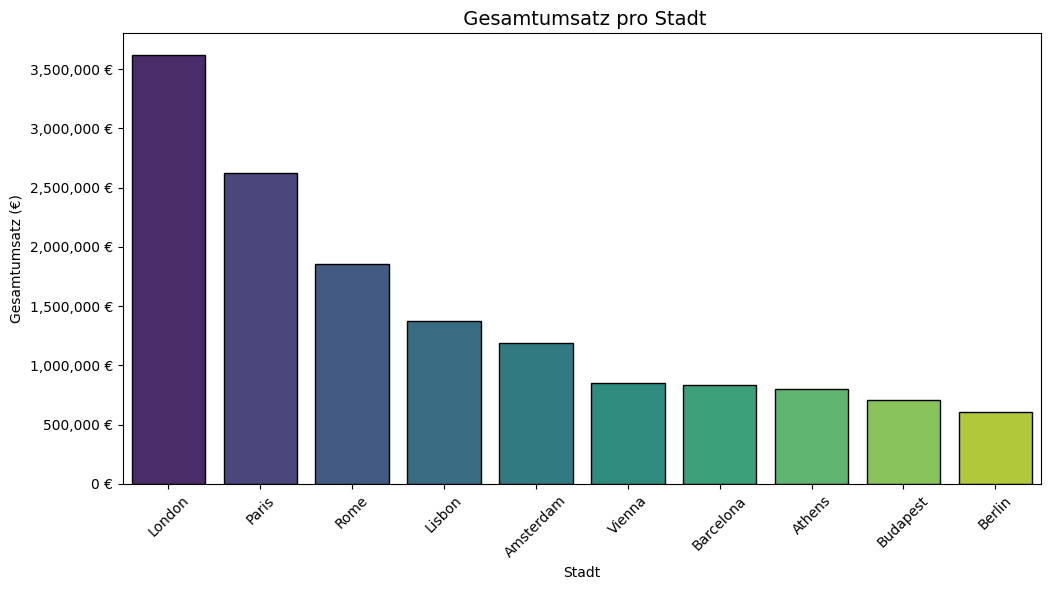

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Schritt 1–3: Gesamtumsatz pro Stadt berechnen
umsatz_stadt = df_copy_2.groupby('city')['price'].sum().sort_values(ascending=False)

# Schritt 4: Visualisierung
plt.figure(figsize=(10, 6))
sns.barplot(x=umsatz_stadt.index, y=umsatz_stadt.values, palette='viridis',edgecolor='black')

plt.title(' Gesamtumsatz pro Stadt', fontsize=14)
plt.xlabel('Stadt')
plt.ylabel('Gesamtumsatz (€)')
plt.xticks(rotation=45)
plt.tight_layout()
# Währung als ganze Zahl anzeigen
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,} €'))
plt.show()

## Folie 5 – Anteil Superhosts vs. Hosts

### Text:
### „Nur ein kleiner Teil der Gastgeber ist Superhost.
### Superhosts bieten eine höhere Servicequalität, sind aber im Marktanteil klar in der Minderheit.“

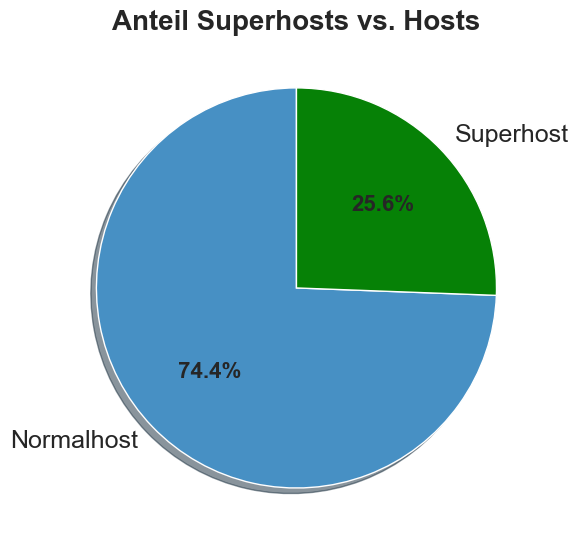

In [ ]:
import matplotlib.pyplot as plt

# Host-Zählungen
host_counts = df_copy_2['host_is_superhost'].value_counts()
host_counts.index = ['Normalhost', 'Superhost']

# Diagramm
plt.figure(figsize=(6, 6))  # etwas größere Figur
wedges, texts, autotexts = plt.pie(
    host_counts, 
    labels=host_counts.index, 
    autopct='%1.1f%%', 
    colors=["#4790c4", "#068106"], 
    shadow=True, 
    startangle=90,
    textprops={'fontsize': 18}  # größere Schrift für Labels
)

# Prozentzahlen größer und fett
for autotext in autotexts:
    autotext.set_fontsize(16)
    autotext.set_weight('bold')

# Titel größer machen
plt.title('Anteil Superhosts vs. Hosts', fontsize=20, weight='bold')

plt.tight_layout()
plt.show()


## Folie 6 – Umsatzvergleich Superhosts vs. Hosts

### Text:
### „Obwohl Superhosts höhere Preise verlangen, wird der Gesamtumsatz größtenteils von normalen Hosts erzielt – einfach weil es viel mehr davon gibt.
### Für Qualität und bessere Lage lohnt sich der Blick auf Superhosts dennoch.“

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\436894843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=umsatz_host.index, y=umsatz_host.values, palette='coolwarm',edgecolor='black')


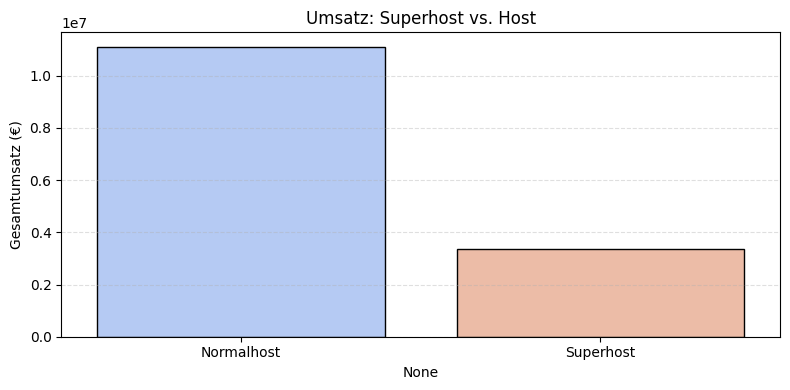

In [ ]:
umsatz_host = df_copy_2.groupby('host_is_superhost')['price'].sum()
umsatz_host.index = ['Normalhost', 'Superhost']

plt.figure(figsize=(8,4))
sns.barplot(x=umsatz_host.index, y=umsatz_host.values, palette='coolwarm',edgecolor='black')
plt.title('Umsatz: Superhost vs. Host')
plt.ylabel('Gesamtumsatz (€)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Folie 7 – Städte mit den meisten Superhosts

### Text:
### „In Städten wie Paris und Barcelona ist der Superhost-Anteil besonders hoch.
### Berlin und Wien haben vergleichsweise wenige Superhosts.“

In [ ]:
superhosts_by_city = df_copy_2.groupby('city')['host_is_superhost'].mean().sort_values(ascending=False) * 100
superhosts_by_city


city
Athens       42.859848
Budapest     37.891596
Rome         32.668661
Vienna       28.413910
Amsterdam    28.413462
Berlin       25.724638
Lisbon       21.395107
Barcelona    18.143311
London       15.741019
Paris        14.069976
Name: host_is_superhost, dtype: float64

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\2599346376.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=superhosts_by_city.index, y=superhosts_by_city.values, palette='viridis',edgecolor='black')


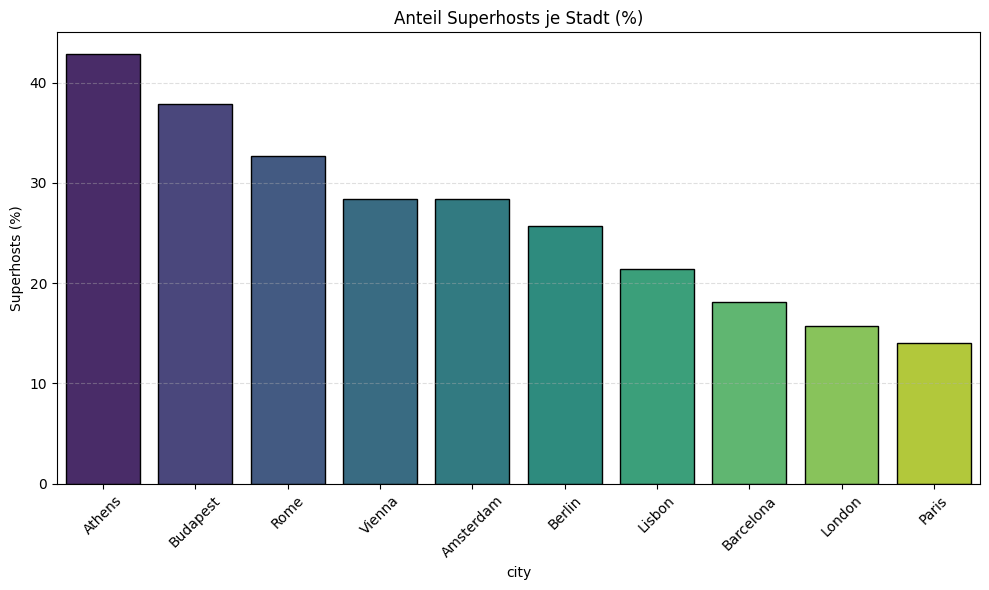

In [ ]:
superhosts_by_city = df_copy_2.groupby('city')['host_is_superhost'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=superhosts_by_city.index, y=superhosts_by_city.values, palette='viridis',edgecolor='black')
plt.title('Anteil Superhosts je Stadt (%)')
plt.ylabel('Superhosts (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Folie 8 – Zimmerarten pro Stadt

### Text:
### „Die beliebtesten Unterkunftsarten sind ganze Apartments.
### Privatzimmer sind vor allem in günstigen Städten häufiger, während Shared Rooms kaum eine Rolle spielen.“

In [ ]:
room_city = df_copy_2.groupby(['city', 'room_type']).size().unstack(fill_value=0)
room_city

room_type,Entire home/apt,Private room,Shared room
city,,,
Amsterdam,1126,944,10
Athens,4872,397,11
Barcelona,542,2279,12
Berlin,882,1529,73
Budapest,3589,419,14
Lisbon,3878,1811,74
London,4384,5559,50
Paris,5067,1527,94
Rome,5561,3454,12


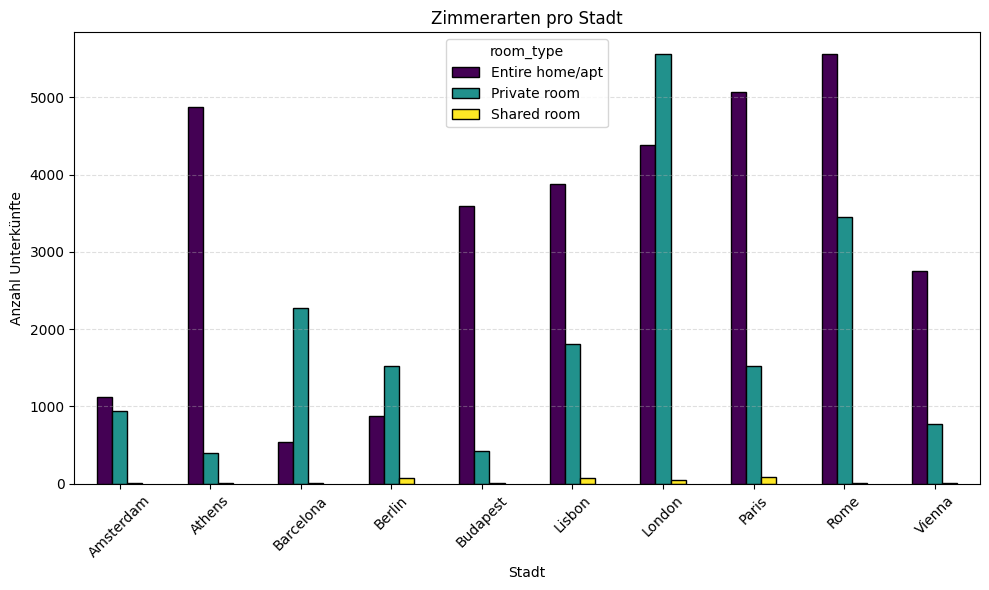

In [ ]:
room_city = df_copy_2.groupby(['city', 'room_type']).size().unstack(fill_value=0)

room_city.plot(kind='bar', stacked=False, figsize=(10,6), colormap='viridis',edgecolor='black')
plt.title('Zimmerarten pro Stadt')
plt.ylabel('Anzahl Unterkünfte')
plt.xlabel('Stadt')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Folie 9 – Boxplot Preis vs. Personenkapazität

### Text:
### „Der Preis steigt mit der Personenkapazität, aber nicht linear.
### Kleinere Unterkünfte sind preislich stabiler, während große Apartments deutlich teurer und preisschwankender sind.“

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\2708910814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='person_capacity', y='price', data=df_copy_2, palette='Set2')


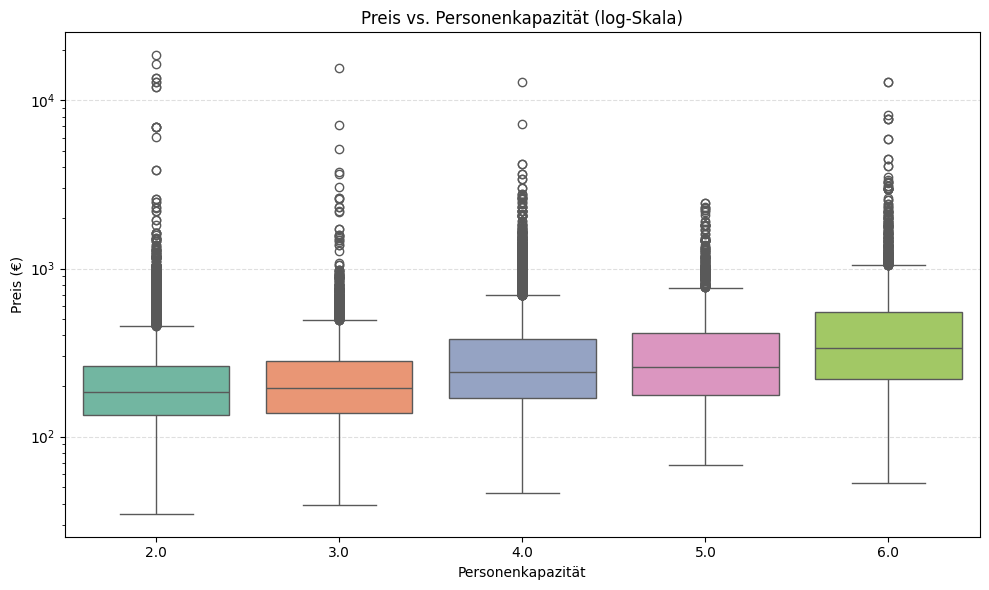

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='person_capacity', y='price', data=df_copy_2, palette='Set2')
plt.yscale('log')
plt.title('Preis vs. Personenkapazität (log-Skala)')
plt.xlabel('Personenkapazität')
plt.ylabel('Preis (€)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Folie 10 – Scatterplot Preis vs. Zentrum

### Text:
### „In Amsterdam, London und Berlin sehen wir einen deutlichen Preisaufschlag für zentrale Lagen – bis zu 100 % teurer.
### Paris ist die Ausnahme: dort sind alle Lagen relativ teuer.“

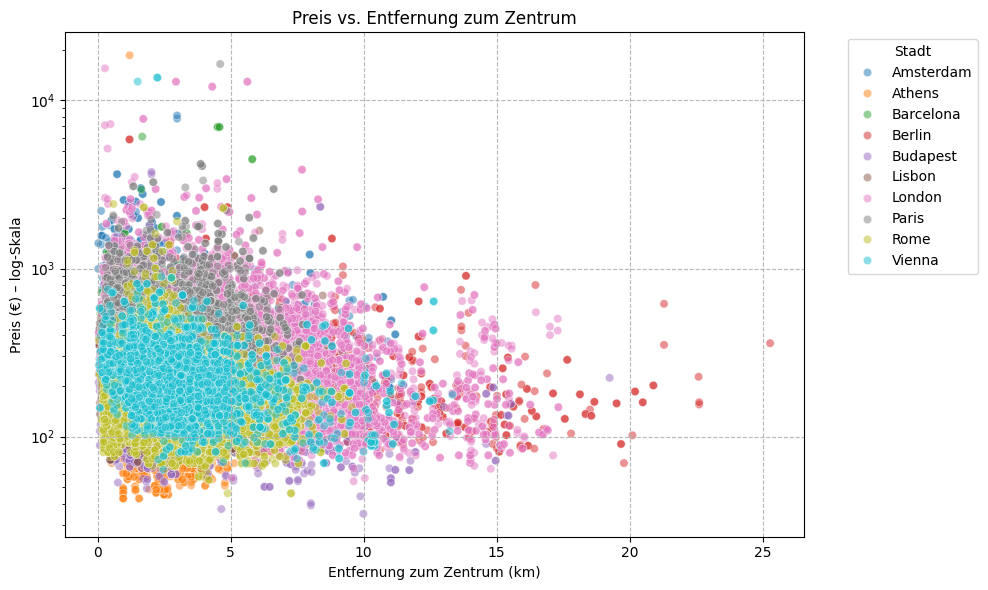

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='centr_dist', y='price', hue='city', data=df_copy_2, alpha=0.5, palette='tab10')
plt.yscale('log')
plt.title('Preis vs. Entfernung zum Zentrum')
plt.xlabel('Entfernung zum Zentrum (km)')
plt.ylabel('Preis (€) – log-Skala')
plt.legend(title='Stadt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


# Eine Zwieschenstudie

In [ ]:
import pandas as pd
import numpy as np

# Falls host_is_superhost Bool ist, in int umwandeln (0/1), sonst tut's auch so:
df_copy_2['host_is_superhost'] = df_copy_2['host_is_superhost'].astype(int)

# Kennzahlen je Stadt
agg = (df_copy_2
       .groupby('city')
       .agg(
           superhost_rate_pct = ('host_is_superhost', lambda x: 100 * x.mean()),
           superhost_count    = ('host_is_superhost', 'sum'),
           listing_count      = ('host_is_superhost', 'size')
       )
      )

agg['normalhost_count'] = agg['listing_count'] - agg['superhost_count']

# hübsch formatieren & sortieren (nach Rate oder Count – wähl aus)
result = (agg
          .round({'superhost_rate_pct': 2})
          .sort_values('superhost_rate_pct', ascending=False)
         )

print(result)


           superhost_rate_pct  superhost_count  listing_count  \
city                                                            
Athens                  42.86             2263           5280   
Budapest                37.89             1524           4022   
Rome                    32.67             2949           9027   
Amsterdam               28.41              591           2080   
Vienna                  28.41             1005           3537   
Berlin                  25.72              639           2484   
Lisbon                  21.40             1233           5763   
Barcelona               18.14              514           2833   
London                  15.74             1573           9993   
Paris                   14.07              941           6688   

           normalhost_count  
city                         
Athens                 3017  
Budapest               2498  
Rome                   6078  
Amsterdam              1489  
Vienna                 2532  
Berlin   

### 2) Diagramm 1 – Superhost‑Anteil (%) vs. Anzahl Listings

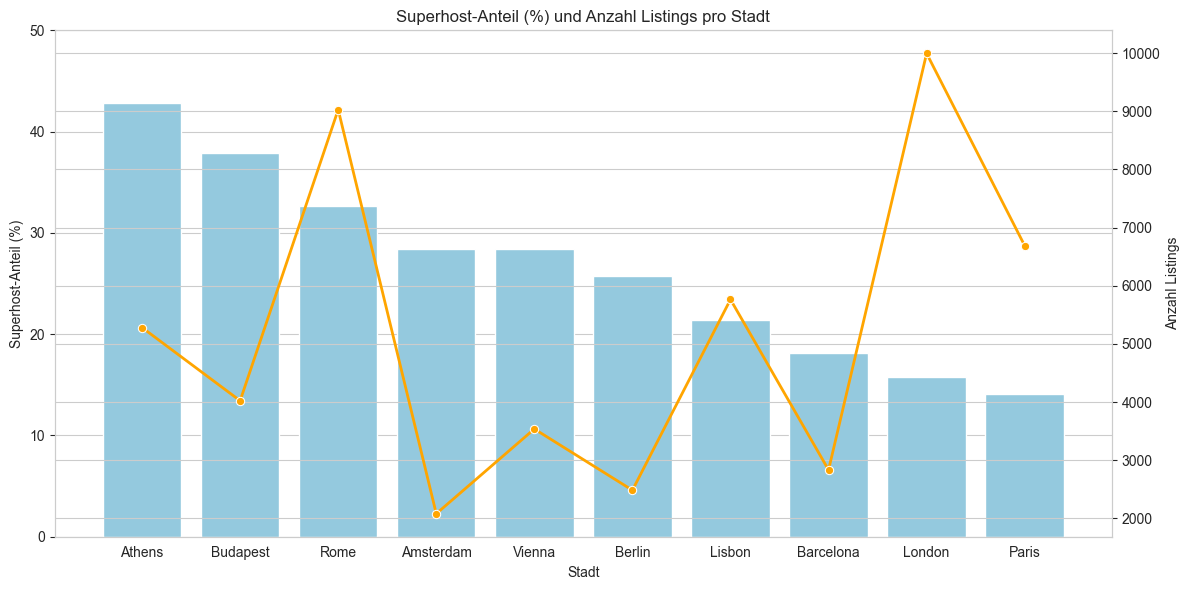

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

df_plot = result.sort_values('superhost_rate_pct', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Balken: Superhost-Anteil in %
sns.barplot(
    x=df_plot.index,
    y=df_plot['superhost_rate_pct'],
    color='skyblue',
    ax=ax1
)
ax1.set_ylabel('Superhost-Anteil (%)')
ax1.set_xlabel('Stadt')
ax1.set_ylim(0, max(50, df_plot['superhost_rate_pct'].max() * 1.15))

# Zweite Achse: Anzahl Listings
ax2 = ax1.twinx()
sns.lineplot(
    x=df_plot.index,
    y=df_plot['listing_count'],
    color='orange',
    marker='o',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel('Anzahl Listings')

plt.title('Superhost-Anteil (%) und Anzahl Listings pro Stadt')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3) Diagramm 2 – Absolute Zahlen: Superhost vs. Normalhost (Stacked Bars)

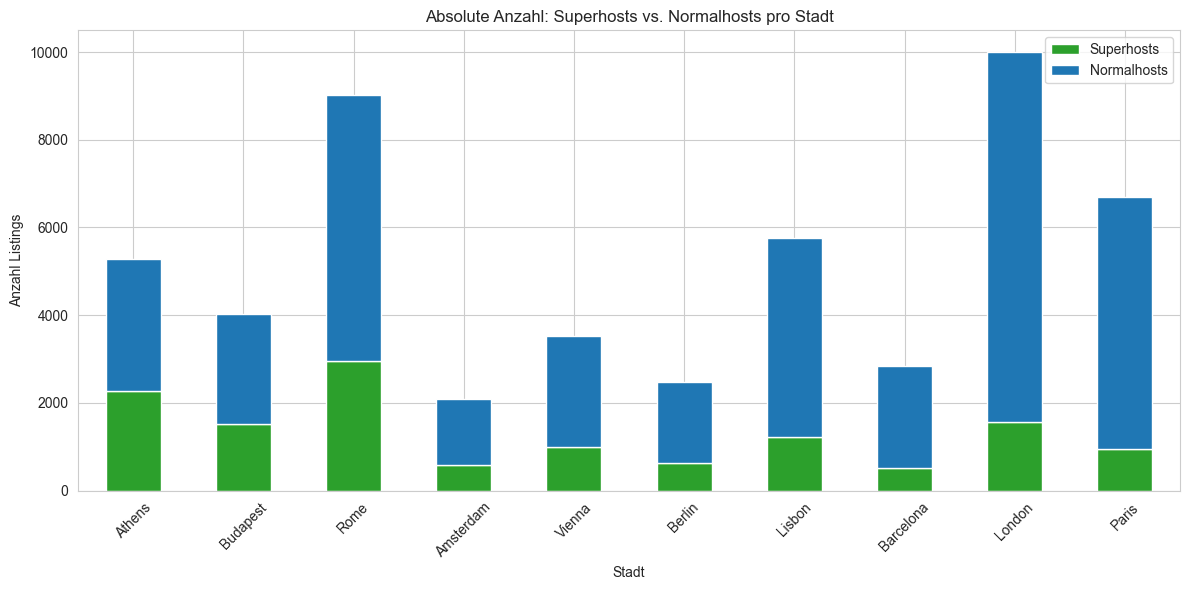

In [ ]:
stack_df = df_plot[['superhost_count', 'normalhost_count']]

stack_df.plot(kind='bar', stacked=True, figsize=(12,6), color=['#2ca02c', '#1f77b4'])
plt.title('Absolute Anzahl: Superhosts vs. Normalhosts pro Stadt')
plt.ylabel('Anzahl Listings')
plt.xlabel('Stadt')
plt.xticks(rotation=45)
plt.legend(['Superhosts', 'Normalhosts'])
plt.tight_layout()
plt.show()


## Folie 11 – Scatterplot Preis vs. Metro

### Text:
### „Metro-Nähe ist ein wichtiger Preistreiber in Metropolen wie London, Paris und Amsterdam.
### In südlichen Städten wie Rom oder Lissabon spielt die Metro-Nähe kaum eine Rolle.“

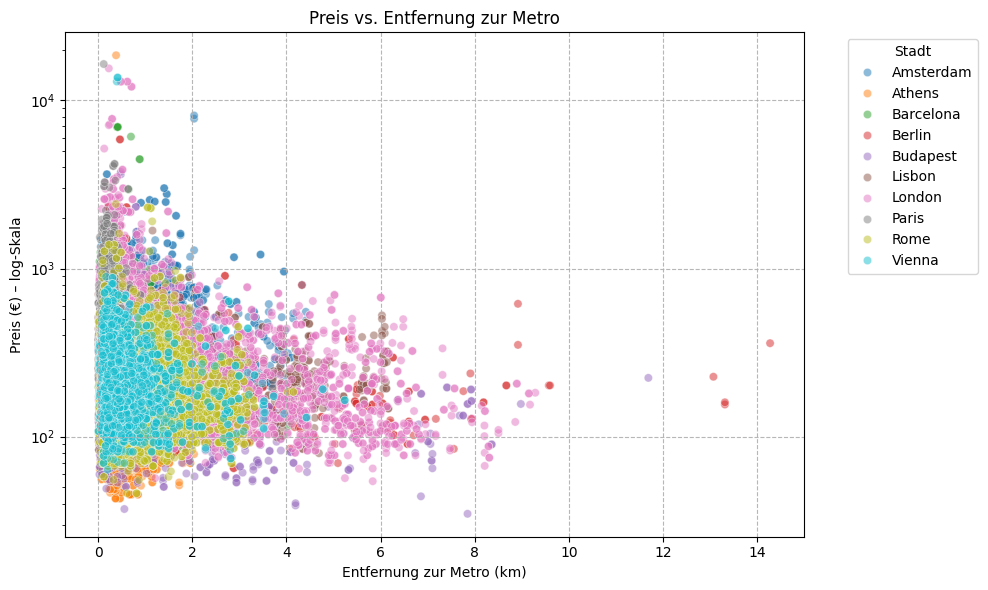

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='metro_dist', y='price', hue='city', data=df_copy_2, alpha=0.5, palette='tab10')
plt.yscale('log')
plt.title('Preis vs. Entfernung zur Metro')
plt.xlabel('Entfernung zur Metro (km)')
plt.ylabel('Preis (€) – log-Skala')
plt.legend(title='Stadt', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


## Folie 12 – Preis Zentrum vs. Außen (pro Stadt)

### Text:
### „Hier sehen Sie den Vergleich von Zentrum (0–5 km) und Außenlage (>10 km).
### Vor allem in London und Amsterdam ist der Preisunterschied enorm – hier kann man durch etwas größere Distanz deutlich sparen.“
### Athen,Paris,Rome und Barcelona sind keine Daten ausserhalb der 10 km.

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\989828305.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_center_price = df_copy_2.groupby(['city', 'center_cat'])['price'].mean().unstack()


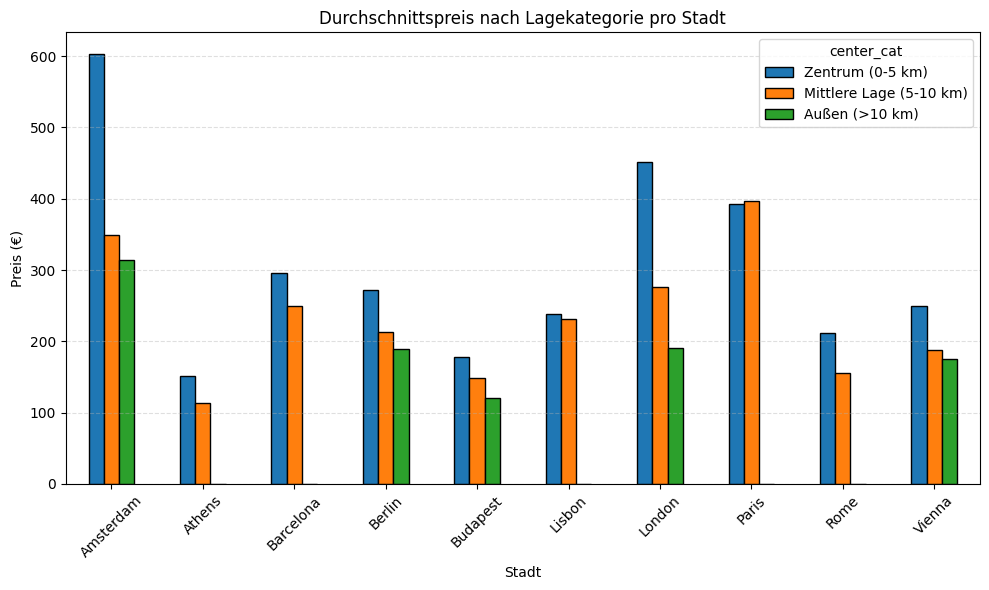

In [ ]:
df_copy_2['center_cat'] = pd.cut(df_copy_2['centr_dist'], bins=[0, 5, 10, df_copy_2['centr_dist'].max()],
                                 labels=['Zentrum (0-5 km)', 'Mittlere Lage (5-10 km)', 'Außen (>10 km)'])

city_center_price = df_copy_2.groupby(['city', 'center_cat'])['price'].mean().unstack()

city_center_price.plot(kind='bar', figsize=(10,6),edgecolor='black')
plt.title('Durchschnittspreis nach Lagekategorie pro Stadt')
plt.ylabel('Preis (€)')
plt.xlabel('Stadt')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Folie 13 – Metro-nah vs. Metro-fern

### Text:
### „In London sind Metro-nahe Unterkünfte bis zu 45 % teurer als weiter entfernte.
### Das bestätigt, dass in nördlichen Großstädten die Lage sehr stark auf den Preis wirkt.“

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1748024600.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_metro_price = df_copy_2.groupby(['city', 'metro_cat'])['price'].mean().unstack()


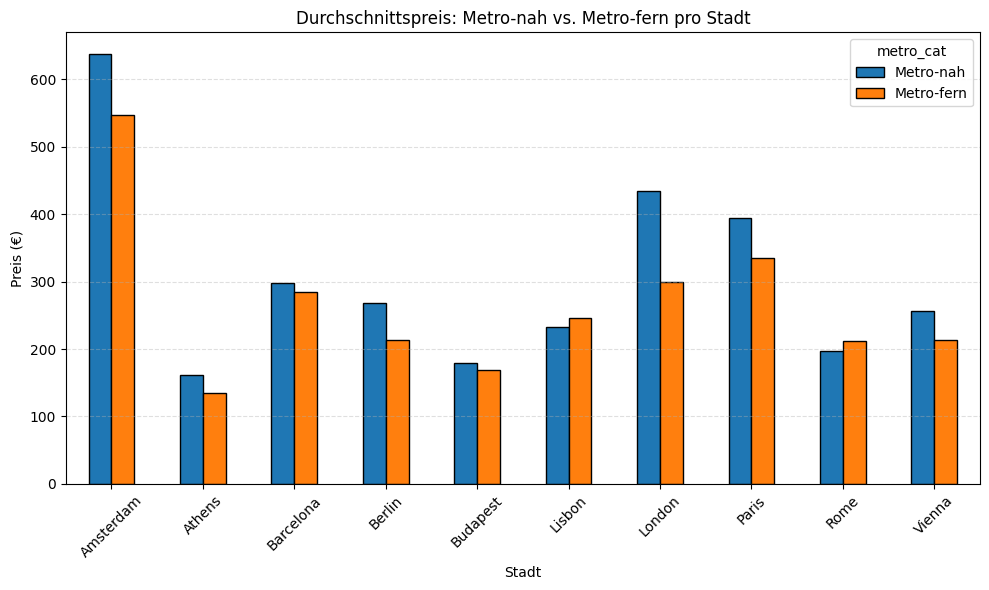

In [ ]:
df_copy_2['metro_cat'] = pd.cut(df_copy_2['metro_dist'], bins=[0, 0.5, df_copy_2['metro_dist'].max()],
                                labels=['Metro-nah', 'Metro-fern'])

city_metro_price = df_copy_2.groupby(['city', 'metro_cat'])['price'].mean().unstack()

city_metro_price.plot(kind='bar', figsize=(10,6),edgecolor='black')
plt.title('Durchschnittspreis: Metro-nah vs. Metro-fern pro Stadt')
plt.ylabel('Preis (€)')
plt.xlabel('Stadt')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Folie 14 – Gesamtfazit

### „Unsere Analyse zeigt:

    Nord-Europa ist grundsätzlich teurer, während Südeuropa günstigere Alternativen bietet.

    Superhosts und zentrale Lagen erhöhen den Preis, bieten aber mehr Qualität.

    Für die Kostenplanung empfiehlt es sich, Randlagen oder südliche Städte zu bevorzugen, wenn Budget eine Rolle spielt.“

### Screenshot-Tipp

    Verwende plt.figure(figsize=(10,6)) für perfekte Screenshot-Größe.

    Speichern direkt mit plt.savefig('plot.png', dpi=200).

### Titel: „Attraktivitäts- & Restaurantindex nach Stadt“
Botschaft:

    Städte wie Rom, Barcelona und Paris punkten mit hohen Attraktivitäts- und Restaurantwerten.

    Berlin und Wien liegen eher im unteren Bereich.

    Diese Indizes spiegeln touristische Anziehungskraft und kulinarische Dichte wider, sind aber nur schwach mit dem Preis korreliert.

<Figure size 1000x600 with 0 Axes>

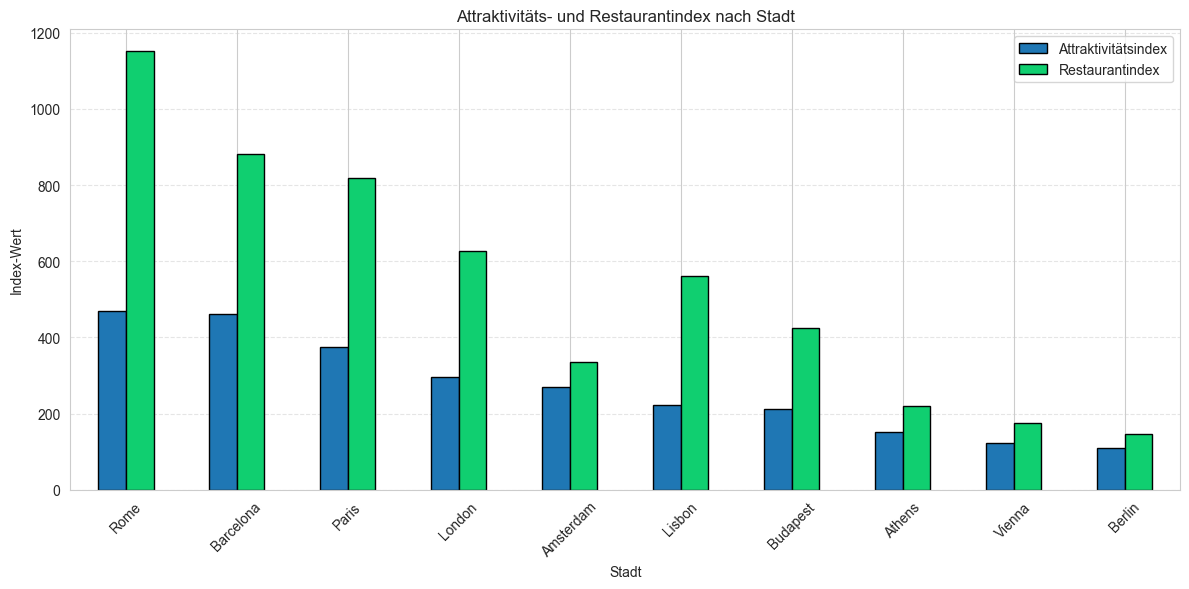

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Mittelwerte der Indizes pro Stadt
attr_rest = (
    df_copy_2.groupby('city')[['attr_index', 'rest_index']]
    .mean()
    .round(1)
    .sort_values('attr_index', ascending=False)
)

# 2) Balkendiagramm
plt.figure(figsize=(10,6))
attr_rest.plot(kind='bar', figsize=(12,6), color=['#1f77b4',"#10cf70"],edgecolor='black')
plt.title('Attraktivitäts- und Restaurantindex nach Stadt')
plt.ylabel('Index-Wert')
plt.xlabel('Stadt')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(['Attraktivitätsindex', 'Restaurantindex'])
plt.tight_layout()
plt.show()


### Text für die Folie:
„Hier sehen wir die touristische Attraktivität und Restaurantdichte pro Stadt. Rom, Barcelona und Paris haben die höchsten Werte. Berlin und Wien sind eher zurückhaltend. Diese Werte sind interessante Kontextfaktoren, die den Preis jedoch nur moderat beeinflussen.“

# Vorschlag für 2 Folien zur Sauberkeit

## Folie „Sauberkeitsverteilung“

    Diagramm: Histogramm oder Boxplot der Sauberkeitsbewertungen.

    Botschaft:

        Die meisten Unterkünfte liegen zwischen 8 und 10 Punkten.

        Es gibt kaum extreme Ausreißer.

        Sauberkeit hat keinen signifikanten Einfluss auf den Preis, ist aber ein wichtiges Qualitätskriterium.

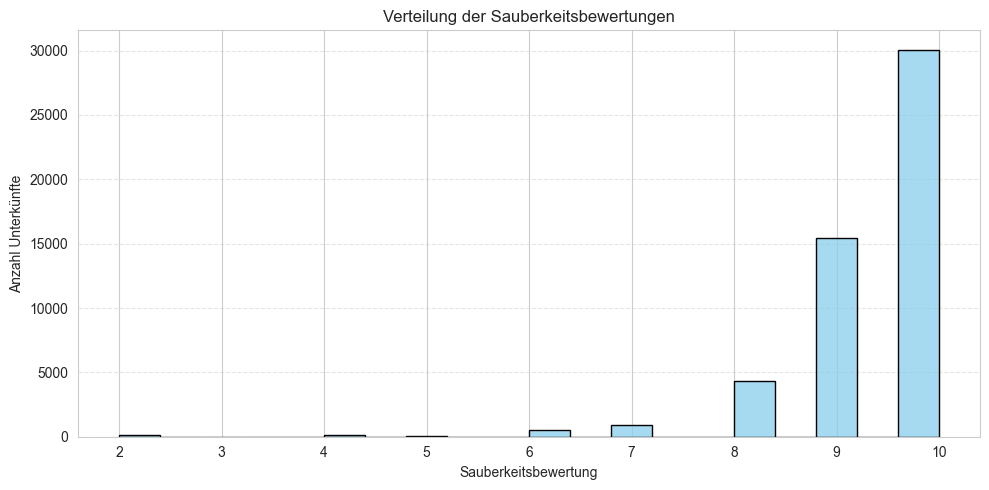

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_copy_2['cleanliness_rating'], bins=20, kde=False, color='skyblue',edgecolor='black')
plt.title('Verteilung der Sauberkeitsbewertungen')
plt.xlabel('Sauberkeitsbewertung')
plt.ylabel('Anzahl Unterkünfte')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Folie „Sauberkeit vs. Preis (Boxplot)“

    Diagramm: Boxplot, um zu zeigen, ob höhere Sauberkeit mit höheren Preisen zusammenhängt.

    Botschaft:

        Die Preisverteilung ist bei allen Sauberkeitswerten ähnlich.

        Unterkünfte mit niedriger Sauberkeit sind nicht zwingend günstiger.

C:\Users\varel\AppData\Local\Temp\ipykernel_27332\1027349511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cleanliness_rating', y='price', data=df_copy_2, palette='Set2')


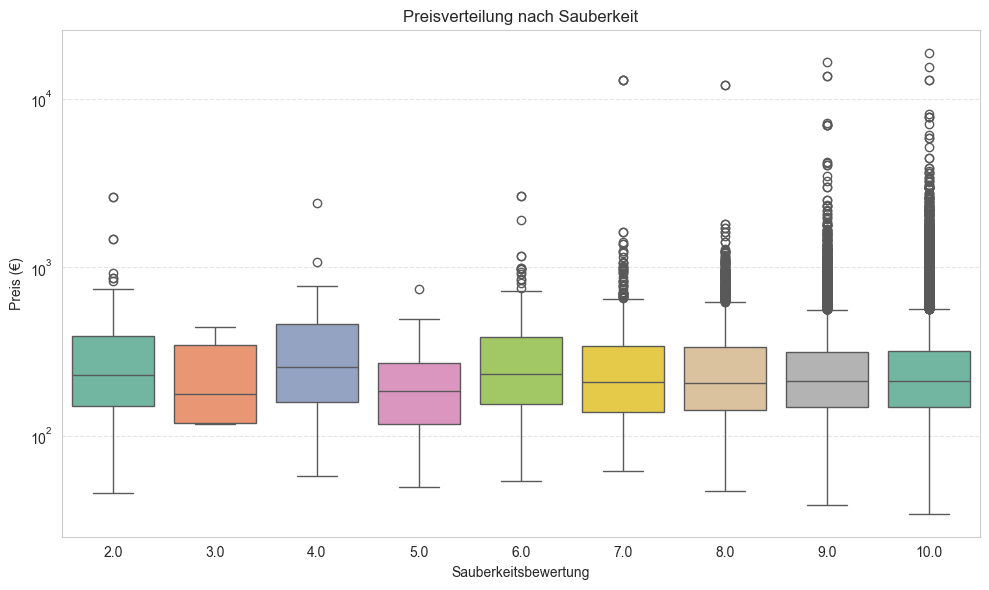

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cleanliness_rating', y='price', data=df_copy_2, palette='Set2')
plt.yscale('log')  # Log-Skala für bessere Sichtbarkeit
plt.title('Preisverteilung nach Sauberkeit')
plt.xlabel('Sauberkeitsbewertung')
plt.ylabel('Preis (€)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Text für die Folien

„Die Sauberkeitsbewertungen sind überwiegend sehr hoch (8–10), was auf ein gutes Qualitätsniveau hinweist.
Preislich sehen wir keine klare Tendenz, dass höhere Sauberkeit zu höheren Preisen führt.“

## erklärung eines Boxplots

### Box (Rechteck):

    Zeigt, wo die mittleren 50 % der Preise liegen (zwischen dem 25. und 75. Perzentil).

    Je höher und größer die Box, desto breiter streuen die Preise.

Mittellinie in der Box:

    Das ist der Median (50 % der Werte liegen darunter, 50 % darüber).

„Whisker“ (Linien oberhalb und unterhalb der Box):

    Sie zeigen, wie weit die meisten Daten nach oben/unten reichen.

Kreise/Punkte:

    Das sind Ausreißer, also Preise, die ungewöhnlich hoch oder niedrig sind.

# Was sehen wir bei cleanliness_rating?

### Bewertung = 2:
Ja, hier gibt es einige teure Ausreißer. Das heißt:
„Nicht jede teure Unterkunft ist automatisch sauber.“
→ Richtige Beobachtung von dir!

Bewertungen 8–10:
Hier gibt es viele Unterkünfte, auch im hohen Preisbereich.
Das ist normal, weil luxuriöse Unterkünfte meist gut bewertet werden.

Allgemein:
Die Sauberkeit beeinflusst den Preis nur schwach, weil es teure Apartments mit niedriger Bewertung und günstige mit hoher Bewertung gibt.

### Wie kannst du das präsentieren?

Du kannst sagen:

    „Das Boxplot zeigt, dass der Großteil der Preise zwischen X und Y liegt. Bei einer Bewertung von 2 sehen wir zwar teure Ausreißer, aber das ist nicht die Regel.
    Ab 8–10 sehen wir, dass viele teure Unterkünfte auch sehr gute Sauberkeit haben, was typisch für Premium-Apartments ist.“

### „Dieses Boxplot zeigt die Preisverteilung in Abhängigkeit von der Sauberkeitsbewertung.
Wir sehen, dass der Großteil der Unterkünfte zwischen einer Bewertung von 8 und 10 liegt – hier befinden sich auch viele der teuren Premium-Apartments.
Auffällig ist, dass es bei einer Bewertung von 2 sogar einige sehr teure Ausreißer gibt, was zeigt, dass ein hoher Preis nicht immer mit Sauberkeit einhergeht.“

## ANALISI

### „Unsere Analyse zeigt: Der Preis wird weniger von Sauberkeit oder Ausstattung bestimmt, als von der Wahl der Stadt und der Lage.
### Mit der richtigen Strategie – etwa 2 km weiter raus aus dem Zentrum oder die Wahl eines Südeuropa-Ziels – können Reisende bis zu 50 % sparen, ohne auf Qualität zu verzichten.
### Wer die Preisdynamik versteht, kann nicht nur sparen, sondern auch gezielt nach versteckten Premium-Angeboten suchen – wie die teuren Ausreißer bei schlechter Bewertung zeigen: Preis heißt nicht immer Qualität.“

### 1-Minuten-Closing-Rede

**„Wenn wir eines aus dieser Analyse gelernt haben, dann ist es: Der Preis einer Unterkunft sagt oft weniger über ihre Qualität aus, als wir glauben.
Es sind nicht die Superhosts allein, nicht die Sauberkeit oder der Attraktivitätsindex, die den Preis bestimmen – es ist vor allem die Wahl der Stadt und die Lage innerhalb dieser Stadt.

Nord-Europa verlangt Premiumpreise, während man in Südeuropa für die Hälfte genauso gut – oder besser – wohnen kann. Und wer bereit ist, nur zwei Kilometer vom Zentrum wegzugehen, kann oft hunderte Euro sparen, ohne auf Komfort zu verzichten.

Der überraschende Aha-Moment? Ein hoher Preis ist kein Garant für Qualität: Selbst teure Apartments können schlechte Bewertungen haben, während günstige Geheimtipps von Superhosts glänzen.

Das wichtigste Learning für alle Zuhörer: Wer die Preisdynamik versteht, kann sein Budget strategisch einsetzen, gezielt sparen oder Premium-Angebote finden – und genau diese Fähigkeit macht den Unterschied zwischen einem teuren Urlaub und einem clever geplanten Erlebnis.“**